<font color="orange"> 

# Análisis de Patrones Migratorios de Colombianos en el Exterior mediante Machine Learning

</font>

**Autores:** Jhon Galeano y Luis Alejandro Ortiz

**Universidad:** Corporación Universitaria Minuto de Dios

**Programa Academico:** Especialización en Inteligencia Artificial

**Fecha:** 30/03/2025

**Dataset:** Registro Consular de Colombianos en el Exterior (Ministerio de Relaciones Exteriores de Colombia, Actualización: 1 de marzo de 2025)

**link Dataset:** https://www.datos.gov.co/Estad-sticas-Nacionales/Colombianos-registrados-en-el-exterior/y399-rzwf/about_data 

---

## 1. Introducción: Comprendiendo la Diáspora Colombiana en la Era de los Datos

La migración internacional es un fenómeno demográfico complejo y multidimensional que redefine constantemente el tejido social, económico y cultural tanto de los países de origen como de destino. Colombia, con una historia significativa de emigración, cuenta con una diáspora considerable distribuida globalmente. Comprender las características, patrones y dinámicas de esta población es crucial para el diseño de políticas públicas efectivas, la prestación de servicios consulares adecuados y el fortalecimiento de los lazos con los connacionales en el exterior.

El Ministerio de Relaciones Exteriores de Colombia mantiene un registro consular que, con **1.65 millones de registros y 17 variables clave**, ofrece una oportunidad para ir más allá de los análisis estadísticos descriptivos tradicionales. Estos análisis, aunque valiosos, a menudo simplifican la realidad y pueden ocultar subgrupos heterogéneos y patrones latentes dentro de la población migrante.

Este proyecto se propone aplicar **técnicas avanzadas de Machine Learning**, con un énfasis particular en **algoritmos de agrupamiento (clustering) no supervisados**, para explorar la estructura inherente de la población colombiana registrada en el exterior. Buscamos descubrir segmentaciones significativas y perfiles migratorios que no son aparentes a simple vista, revelando patrones ocultos en las dimensiones geográficas, demográficas, académicas y profesionales. Complementaremos este enfoque con **modelos supervisados** para validar hallazgos, predecir características específicas y comparar la efectividad de ambos enfoques en el contexto del análisis migratorio.

El objetivo final es demostrar cómo la aplicación estratégica de la ciencia de datos y el machine learning puede transformar datos administrativos en **insights accionables y de alto impacto** sobre la diáspora colombiana, sentando un precedente para futuros análisis en el campo de los estudios migratorios.

## 2. Justificación: El Valor Agregado del Machine Learning en Estudios Migratorios

Si bien las estadísticas descriptivas tradicionales nos permiten conocer promedios, distribuciones y tendencias generales (e.g., número de colombianos por país, edad promedio, nivel educativo más común), a menudo fallan en capturar la **heterogeneidad intrínseca** de la población migrante. ¿Existen grupos distintivos de migrantes con combinaciones específicas de edad, nivel educativo, área de conocimiento y destino? ¿Cómo se interrelacionan estas variables para formar perfiles migratorios complejos?

Aquí es donde el Machine Learning, y en particular las técnicas no supervisadas como el clustering, ofrecen un valor diferencial:

1.  **Descubrimiento de Patrones Ocultos:** Los algoritmos de agrupamiento pueden identificar grupos (clusters) de individuos con características similares en múltiples dimensiones simultáneamente, revelando estructuras que no se ajustarían a categorías predefinidas.
2.  **Segmentación Basada en Datos:** En lugar de imponer segmentaciones a priori (e.g., "migración calificada" vs. "no calificada" de forma binaria), el clustering permite que los propios datos definan los segmentos más naturales y relevantes.
3.  **Comprensión Holística:** Permite analizar la interacción compleja entre variables demográficas, geográficas, educativas y profesionales para definir perfiles migratorios integrales.
4.  **Hipótesis Generadoras:** Los resultados del clustering pueden generar nuevas hipótesis sobre las causas y consecuencias de ciertos patrones migratorios, que luego pueden ser investigadas con mayor profundidad o validadas con otros métodos (incluyendo modelos supervisados).
5.  **Comparación Metodológica:** Aplicar tanto técnicas no supervisadas como supervisadas al mismo dataset permite evaluar críticamente la idoneidad y los insights complementarios que cada enfoque aporta al estudio de fenómenos sociales complejos como la migración.

El tamaño considerable del dataset (1.65M filas) y la riqueza de sus variables (geográficas, demográficas, académicas) lo hacen ideal para la aplicación de estas técnicas, permitiendo la identificación de patrones robustos y estadísticamente significativos.

## 3. Objetivo General

Desarrollar un análisis de la población colombiana registrada en el exterior utilizando técnicas de Machine Learning (no supervisado y supervisado) para identificar perfiles migratorios distintivos, descubrir patrones geográficos y socio-profesionales latentes, y evaluar comparativamente la utilidad de diferentes enfoques algorítmicos en la comprensión de la diáspora.

## 4. Objetivos Específicos

Basándonos en las capacidades del dataset y las metas del proyecto:

1.  **Realizar un Análisis Exploratorio de Datos (EDA) :** 
Visualizar distribuciones demográficas (distribuciones de edad, género, estado civil por país/región) y académicas/profesionales. Identificar tendencias iniciales, valores atípicos y posibles problemas de calidad de datos.
2.  **Preprocesar los datos:** Implementar estrategias para manejar valores faltantes, codificar variables categóricas (e.g., País, Nivel Académico, Área Conocimiento, Género, Estado Civil) de manera adecuada para los algoritmos de ML, y escalar características numéricas (e.g., Edad) si es necesario.
3.  **Segmentar la población mediante Clustering (No Supervisado):**
    *   Aplicar y comparar múltiples algoritmos de agrupamiento (e.g., K-Means, DBSCAN, Agrupamiento Jerárquico) utilizando variables clave (geográficas, demográficas, académicas/profesionales).
    *   Determinar el número óptimo de clusters utilizando métricas apropiadas (e.g., método del codo, coeficiente de silueta, índice de Davies-Bouldin).
    *   Caracterizar e interpretar los perfiles de los clusters identificados, describiendo sus rasgos distintivos.
4.  **Analizar Patrones Específicos:**
    *   Investigar la distribución geográfica de los clusters identificados. ¿Existen perfiles asociados a regiones o países específicos?
    *   Analizar la relación entre los clusters y la "migración calificada" (definida a través de Nivel Académico y Área Conocimiento). ¿Hay clusters que representen predominantemente este tipo de migración? ¿Hacia dónde se dirigen?
    *   Explorar la evolución temporal (usando `Fecha de Registro` como proxy, aunque con cautela) de ciertos perfiles o destinos, si es posible identificar tendencias.
5.  **Aplicar Modelado Supervisado (Complementario/Comparativo):**
    *   Definir tareas supervisadas relevantes, por ejemplo:
        *   Predecir el `Nivel Académico` (categoría alta/media/baja) basado en otras características demográficas y geográficas.
        *   Predecir el `País` o `Región` de destino basado en el perfil demográfico y académico de origen (si se dispone de `Ciudad de Nacimiento`).
        *   Utilizar los clusters derivados del paso 3 como variable objetivo para entender qué características predicen mejor la pertenencia a un determinado perfil migratorio.
    *   Entrenar y evaluar modelos de clasificación (e.g., Regresión Logística, Random Forest, Gradient Boosting).
6.  **Comparar Enfoques y Sintetizar Hallazgos:** Evaluar críticamente qué insights únicos proporcionó el clustering en comparación con el EDA tradicional y los modelos supervisados. Discutir las fortalezas y debilidades de cada enfoque en este contexto específico.

## 5. Hipótesis Iniciales

Estas hipótesis guiarán nuestro análisis y serán evaluadas utilizando los métodos propuestos:

1.  **H1 (Perfiles Ocultos):** Existen múltiples perfiles migratorios (_clusters_) estadísticamente distintos dentro de la diáspora colombiana, definidos por combinaciones específicas de variables demográficas, geográficas y académicas/profesionales, que no son evidentes mediante análisis descriptivos simples. *(Justificación: La heterogeneidad esperada en una población tan grande y diversa sugiere que promedios generales ocultan subgrupos significativos. El clustering es ideal para descubrir estas estructuras latentes).*
2.  **H2 (Migración Calificada):** La migración de colombianos con alto nivel educativo (`Nivel Académico` alto) y ciertas `Áreas de Conocimiento` (e.g., STEM, Salud) se concentra en un conjunto específico de países desarrollados, formando clusters geográficos y profesionales identificables. *(Justificación: La teoría de la fuga de cerebros y las políticas migratorias selectivas sugieren patrones específicos para migrantes calificados. Variables como `Nivel Académico`, `Área Conocimiento`, `País` permitirán probar esto).*
3.  **H3 (Influencia Demográfica en Geografía):** Variables demográficas como `Grupo edad`, `Género` y `Estado civil` se correlacionan significativamente con la elección del `País` y `Ciudad de Residencia`, llevando a la formación de clusters con composiciones demográficas particulares en distintas localizaciones. *(Justificación: Ciclos de vida, redes familiares y oportunidades laborales diferenciadas por edad y género suelen influir en los patrones de asentamiento. Las variables demográficas y geográficas del dataset permiten explorar estas relaciones).*
4.  **H4 (Comunidades Espaciales):** Utilizando las coordenadas (`Localización`) y/o la `Ciudad de Residencia`, es posible identificar concentraciones espaciales (comunidades) de colombianos dentro de ciertos países o ciudades mediante algoritmos de clustering espacial (como DBSCAN adaptado o análisis de densidad). *(Justificación: Los migrantes tienden a asentarse cerca de compatriotas, formando enclaves. Las variables `País`, `Ciudad de Residencia`, `Localización` son clave aquí).*
5.  **H5 (Complementariedad Metodológica):** Los modelos supervisados, aunque útiles para tareas predictivas específicas (e.g., predecir destino basado en perfil), serán menos efectivos para descubrir la *estructura natural* y los *perfiles emergentes* de la diáspora en comparación con las técnicas de clustering no supervisado. *(Justificación: El objetivo principal es el descubrimiento de patrones no conocidos a priori, tarea fundamental del aprendizaje no supervisado. La comparación directa evaluará esta premisa).*

## 6. Variables Clave a Utilizar (Selección Inicial)

*   **Geográficas:** `País`, `Código ISO país`, `Ciudad de Residencia`, `Localización`.
*   **Demográficas:** `Grupo edad`, `Edad (años)`, `Género`, `Estado civil`. (`Etnia` podría incluirse si la calidad y varianza lo permiten).
*   **Académicas/Profesionales:** `Nivel Académico`, `Área Conocimiento`, `Sub Área Conocimiento`.
*   **Administrativas/Origen:** `Fecha de Registro` (para análisis temporal exploratorio), `Ciudad de Nacimiento` (para análisis origen-destino si es viable).




## 7. Consideraciones Éticas y Limitaciones

*   **Privacidad:** Aunque el dataset es anonimizado, se debe asegurar no intentar re-identificar individuos. El análisis se centrará en patrones agregados.
*   **Sesgo de Registro:** El dataset solo incluye colombianos *registrados* en consulados. Este grupo puede no ser representativo de *toda* la diáspora (e.g., migrantes irregulares, aquellos no interesados en registrarse). Los resultados deben interpretarse teniendo en cuenta esta limitación.
*   **Actualidad de los Datos:** La fecha de registro puede no coincidir con la fecha de migración. La "última actualización" se refiere al dataset, no necesariamente a la información de cada individuo.
*   **Calidad de Datos:** Investigar la proporción y naturaleza de los valores faltantes y la consistencia de las categorías (e.g., en `Área Conocimiento`).
*   **Interpretabilidad:** Los clusters son constructos matemáticos. Su interpretación como "perfiles reales" requiere validación cualitativa y contextualización cuidadosa.



## 8. Metodología Propuesta (Resumen)

1.  **Adquisición y Comprensión de Datos:** Carga del dataset, revisión inicial de variables, tipos de datos y documentación.

In [1]:
import sys
# Instala los paquetes desde el archivo requirements.txt que está en el directorio raíz (../)
!{sys.executable} -m pip install -r ../requirements.txt

In [2]:
# --- Configuración Inicial ---

import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Añade la raíz del proyecto al sys.path para encontrar el directorio 'src'
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"Ruta del proyecto añadida al path: {project_root}")

# Importa los módulos personalizados desde 'src'
from src.data_preprocessing import load_data
from src.visualization import display_descriptive_stats

print("\n¡Módulos personalizados cargados exitosamente desde src/!")

# Define la ruta al dataset y cárgalo
file_name = 'Colombianos_registrados_en_el_exterior_20250329.csv'
full_file_path = os.path.join(project_root, 'data', 'raw', file_name)

df_migracion = load_data(full_file_path)

# Muestra una previsualización para confirmar la carga
if df_migracion is not None:
    print("\nPrevisualización del DataFrame cargado:")
    display(df_migracion.head(3))

Ruta del proyecto añadida al path: d:\ESP AI\Proyectos_IA_Organizados\colombian-diaspora-analysis

¡Módulos personalizados cargados exitosamente desde src/!
Cargando dataset desde: d:\ESP AI\Proyectos_IA_Organizados\colombian-diaspora-analysis\data\raw\Colombianos_registrados_en_el_exterior_20250329.csv
¡Dataset cargado exitosamente!

Previsualización del DataFrame cargado:


,País,Código ISO país,Ciudad de Residencia,Oficina de registro,Grupo edad,Edad (años),Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Estatura (CM),Ciudad de Nacimiento,Localización,Fecha de Registro,Cantidad de personas
0,AFGANISTAN,AFG,KABOL/KABUL,C. NUEVA DELHI,ADULTO,34,NO INDICA,NO INDICA,NO INDICA,DESCONOCIDO,MASCULINO,SIN ETNIA REGISTRADA,-1,(NO REGISTRA),"(33.93911, 67.709953)",2014-09,1
1,ALBANIA,ALB,TIRANE/FACESH,C. ROMA,DESCONOCIDO,-1,NO INDICA,NO INDICA,BACHILLERATO,DESCONOCIDO,FEMENINO,SIN ETNIA REGISTRADA,-1,COLOMBIA/ANTIOQUIA/ITAGUI,"(41.153332, 20.168331)",2015-10,1
2,ALEMANIA,DEU,BERLIN/BERLIN,C. BERLIN,ADOLESCENTE,12,NINGUNA,NINGUNA,PRIMARIA,SOLTERO,FEMENINO,NINGUNA,-1,ALEMANIA/BERLIN/BERLIN,"(51.165691, 10.451526)",2023-02,1


In [3]:
# Obtener información general del DataFrame (tipos de datos y valores no nulos)
df_migracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652685 entries, 0 to 1652684
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   País                   1652685 non-null  object
 1   Código ISO país        1652685 non-null  object
 2   Ciudad de Residencia   1652685 non-null  object
 3   Oficina de registro    1652685 non-null  object
 4   Grupo edad             1652685 non-null  object
 5   Edad (años)            1652685 non-null  int64 
 6   Área Conocimiento      1652685 non-null  object
 7   Sub Area Conocimiento  1652685 non-null  object
 8   Nivel Académico        1652685 non-null  object
 9   Estado civil           1652685 non-null  object
 10  Género                 1652685 non-null  object
 11  Etnia de la persona    1652685 non-null  object
 12  Estatura (CM)          1652685 non-null  int64 
 13  Ciudad de Nacimiento   1652685 non-null  object
 14  Localización           1652685 non

In [4]:
# Realizar un conteo de valores únicos por columna para entender la cardinalidad
df_migracion.nunique()

País                       193
Código ISO país            188
Ciudad de Residencia     38671
Oficina de registro        127
Grupo edad                   7
Edad (años)                132
Área Conocimiento           14
Sub Area Conocimiento       65
Nivel Académico             12
Estado civil                 8
Género                       4
Etnia de la persona          8
Estatura (CM)              211
Ciudad de Nacimiento     12259
Localización               186
Fecha de Registro          147
Cantidad de personas        26
dtype: int64


2.  **Análisis Exploratorio de Datos (EDA):** Estadísticas descriptivas, visualizaciones univariadas y bivariadas, análisis geoespacial básico, identificación de valores faltantes y atípicos.


In [5]:
# Importa la función de limpieza y aplícala al DataFrame
from src.data_preprocessing import clean_data
# Limpia el DataFrame de migración
df_migracion_limpio = clean_data(df_migracion.copy())

# Muestra una previsualización del DataFrame limpio
print("\nDataFrame después de la limpieza:")
display(df_migracion_limpio.head(3))

Iniciando limpieza de datos...
Limpieza finalizada. Forma del DataFrame: (1652685, 18)

DataFrame después de la limpieza:


,País,Código ISO país,Ciudad de Residencia,Oficina de registro,Grupo edad,Edad (años),Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Estatura (CM),Ciudad de Nacimiento,Localización,Fecha de Registro,Cantidad de personas,Año Registro
0,AFGANISTAN,AFG,KABOL/KABUL,C. NUEVA DELHI,ADULTO,34.000000,NO INDICA,NO INDICA,NO INDICA,DESCONOCIDO,MASCULINO,SIN ETNIA REGISTRADA,165.152863,(NO REGISTRA),"(33.93911, 67.709953)",2014-09-01,1,2014
1,ALBANIA,ALB,TIRANE/FACESH,C. ROMA,DESCONOCIDO,43.920877,NO INDICA,NO INDICA,BACHILLERATO,DESCONOCIDO,FEMENINO,SIN ETNIA REGISTRADA,165.152863,COLOMBIA/ANTIOQUIA/ITAGUI,"(41.153332, 20.168331)",2015-10-01,1,2015
2,ALEMANIA,DEU,BERLIN/BERLIN,C. BERLIN,ADOLESCENTE,12.000000,NINGUNA,NINGUNA,PRIMARIA,SOLTERO,FEMENINO,NINGUNA,165.152863,ALEMANIA/BERLIN/BERLIN,"(51.165691, 10.451526)",2023-02-01,1,2023


In [6]:
# Generar y mostrar las estadísticas descriptivas del DataFrame limpio
display(display_descriptive_stats(df_migracion_limpio))

--- Estadísticas Descriptivas Numéricas ---
        Edad (años)  Estatura (CM)              Fecha de Registro  \
count  1.652685e+06   1.652685e+06                        1652685   
mean   4.392088e+01   1.651529e+02  2019-08-17 23:51:08.797501696   
min    0.000000e+00   0.000000e+00            1900-01-01 00:00:00   
25%    3.200000e+01   1.651529e+02            2016-07-01 00:00:00   
50%    4.200000e+01   1.651529e+02            2019-08-01 00:00:00   
75%    5.500000e+01   1.651529e+02            2023-01-01 00:00:00   
max    1.410000e+02   1.631630e+05            2025-03-01 00:00:00   
std    1.662902e+01   1.744841e+02                            NaN   

       Cantidad de personas  Año Registro  
count          1.652685e+06  1.652685e+06  
mean           1.009007e+00  2.019175e+03  
min            1.000000e+00  1.900000e+03  
25%            1.000000e+00  2.016000e+03  
50%            1.000000e+00  2.019000e+03  
75%            1.000000e+00  2.023000e+03  
max            8.200000e+0

None

--- Iniciando Análisis Visual Exploratorio (EDA) ---


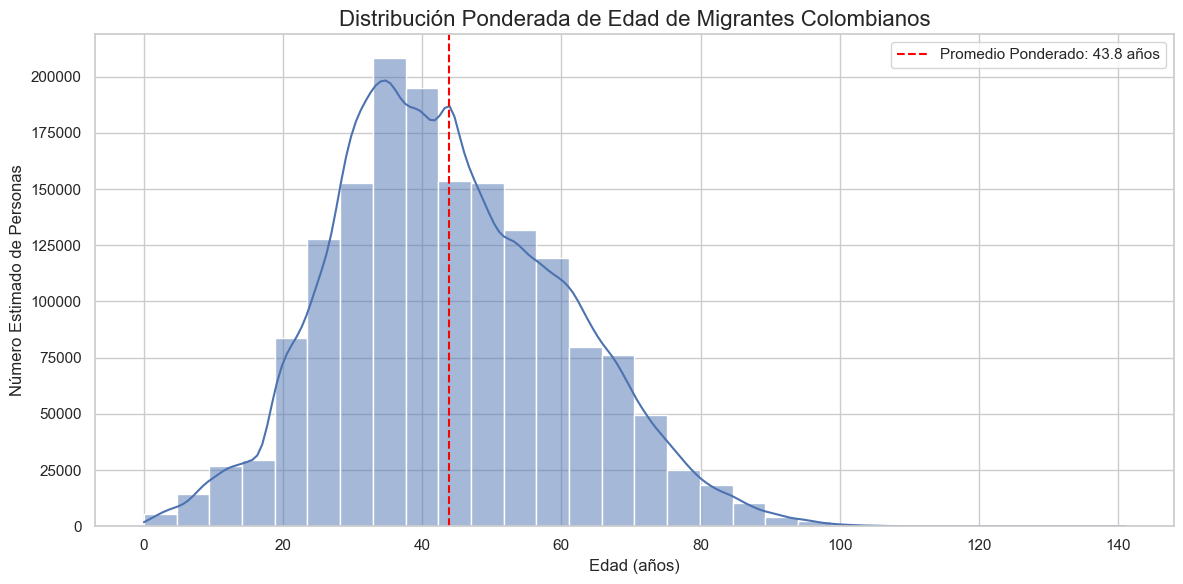

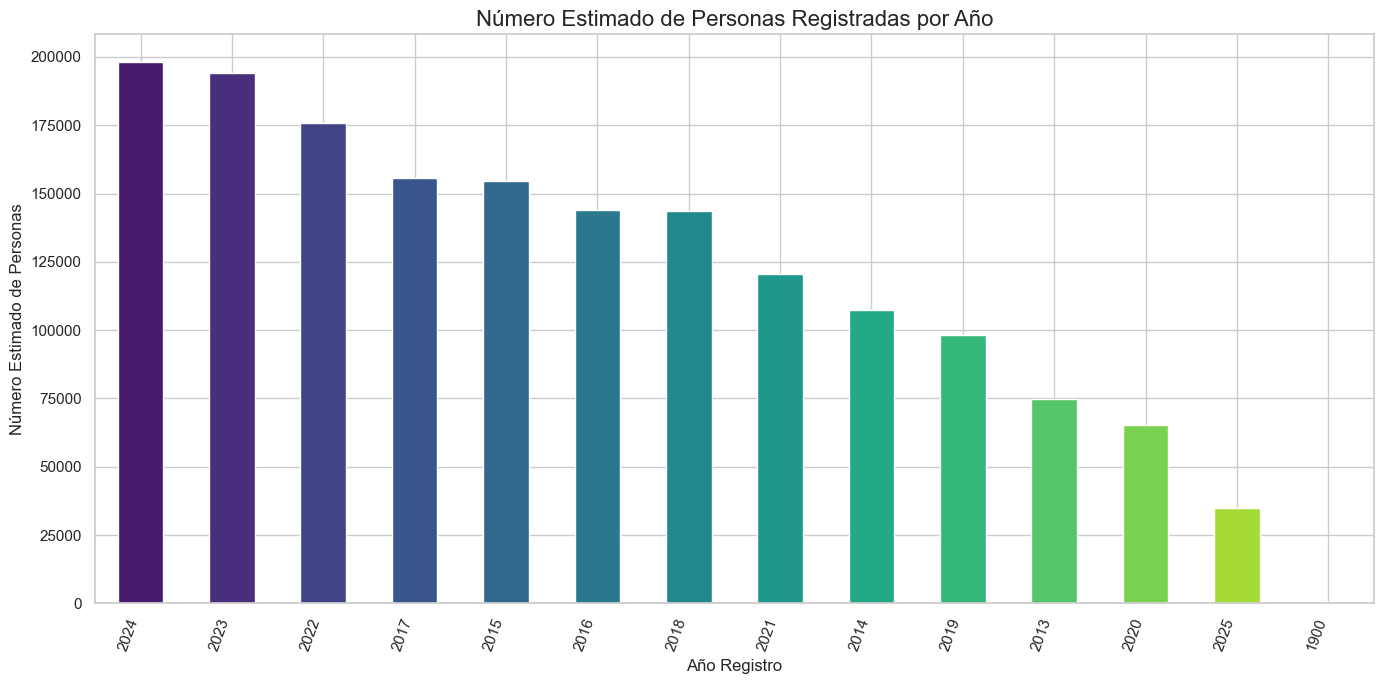

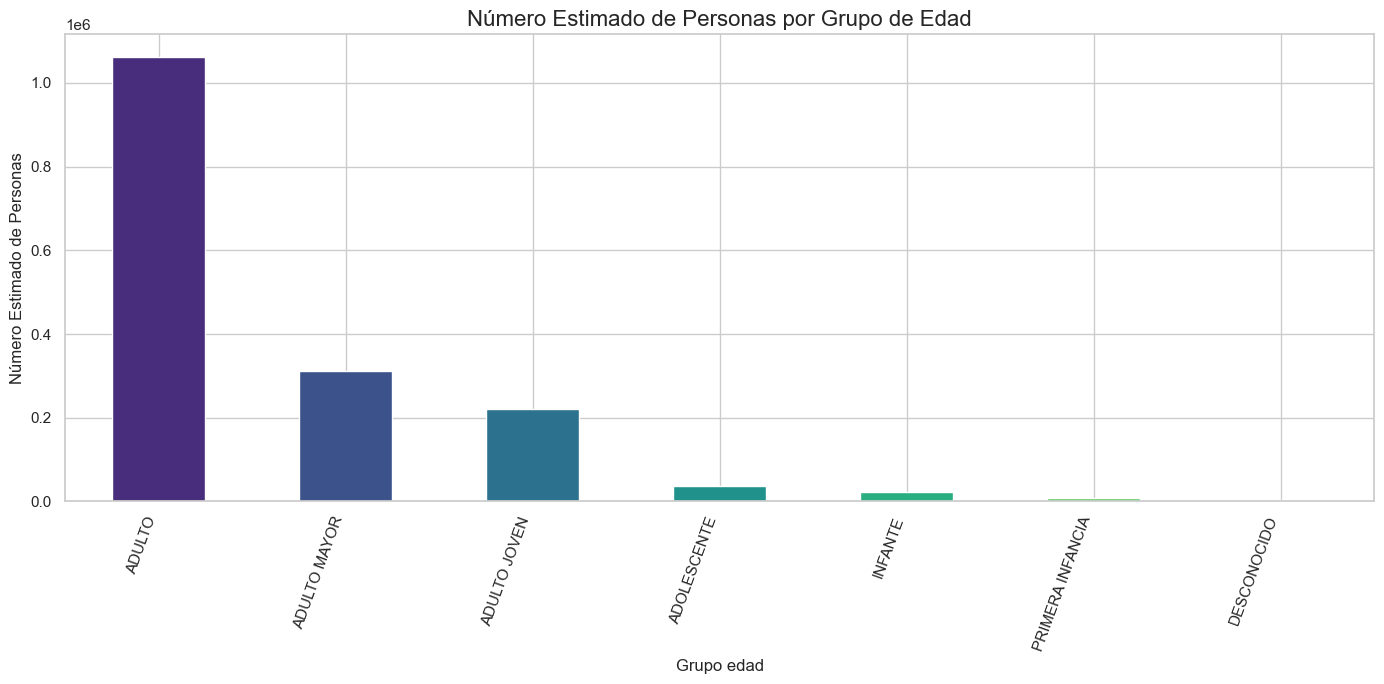

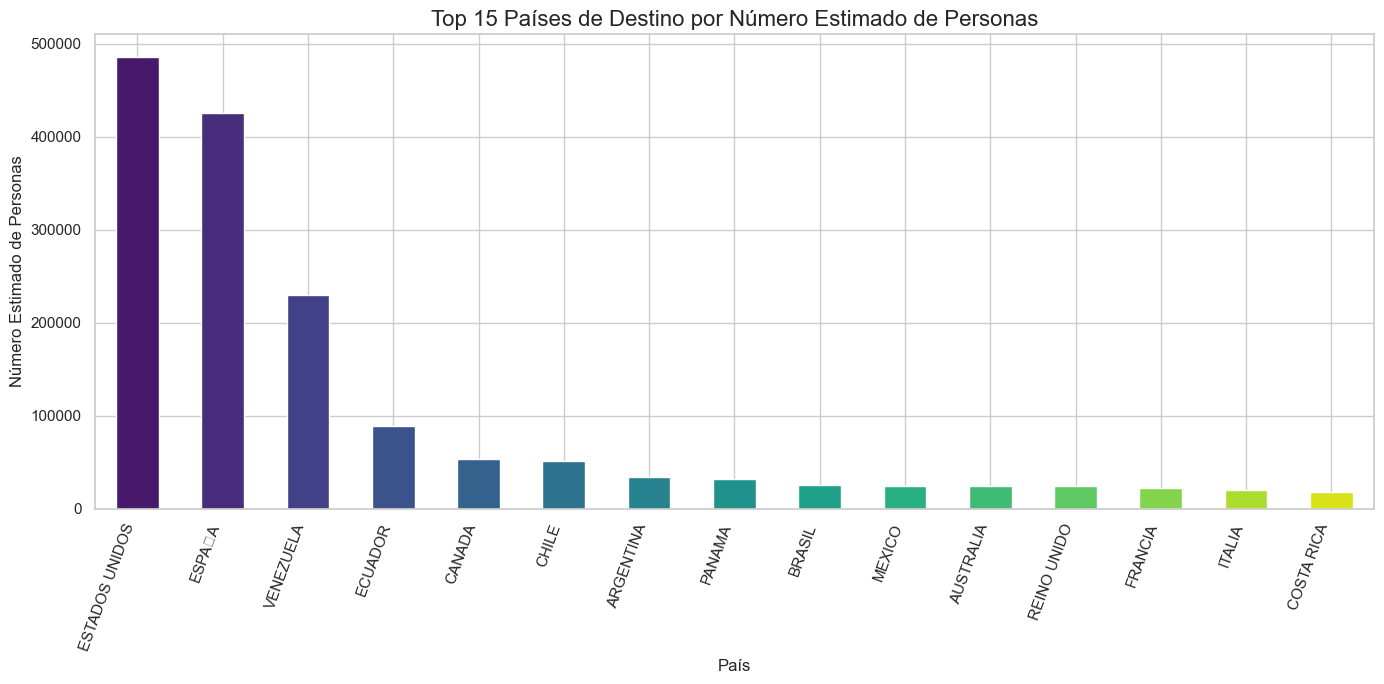

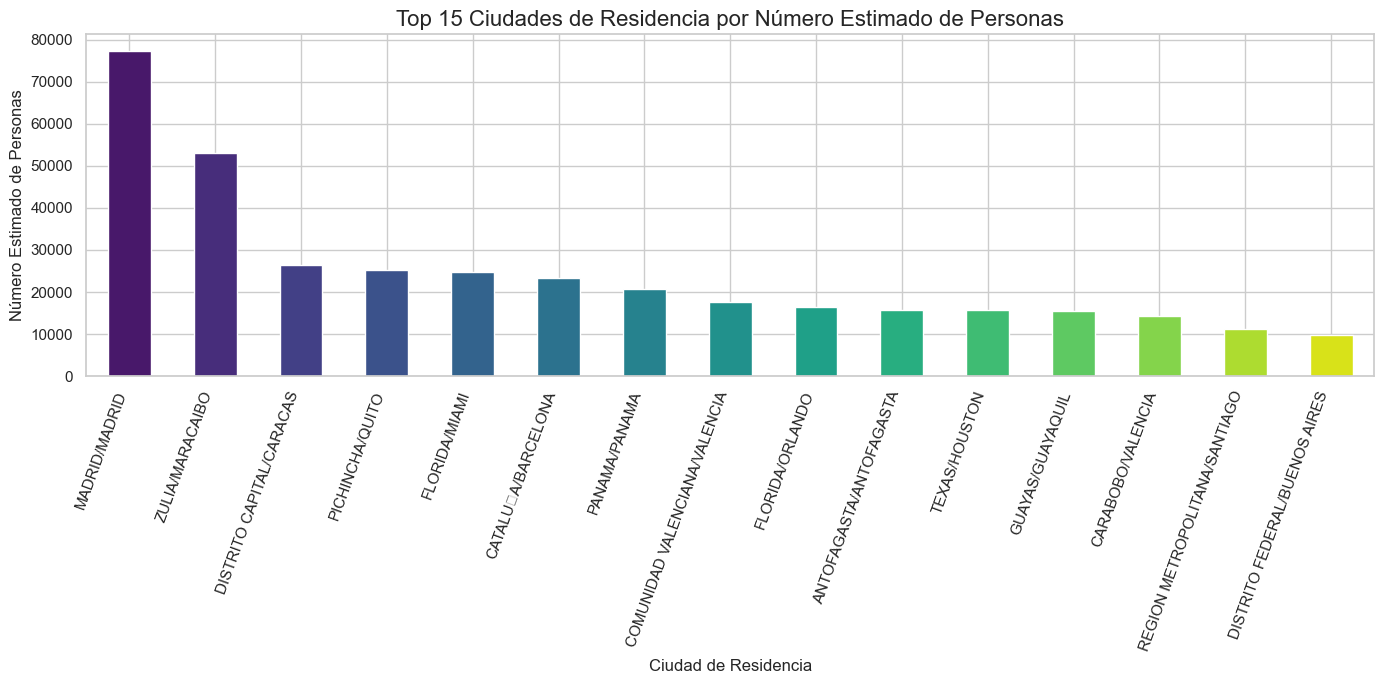

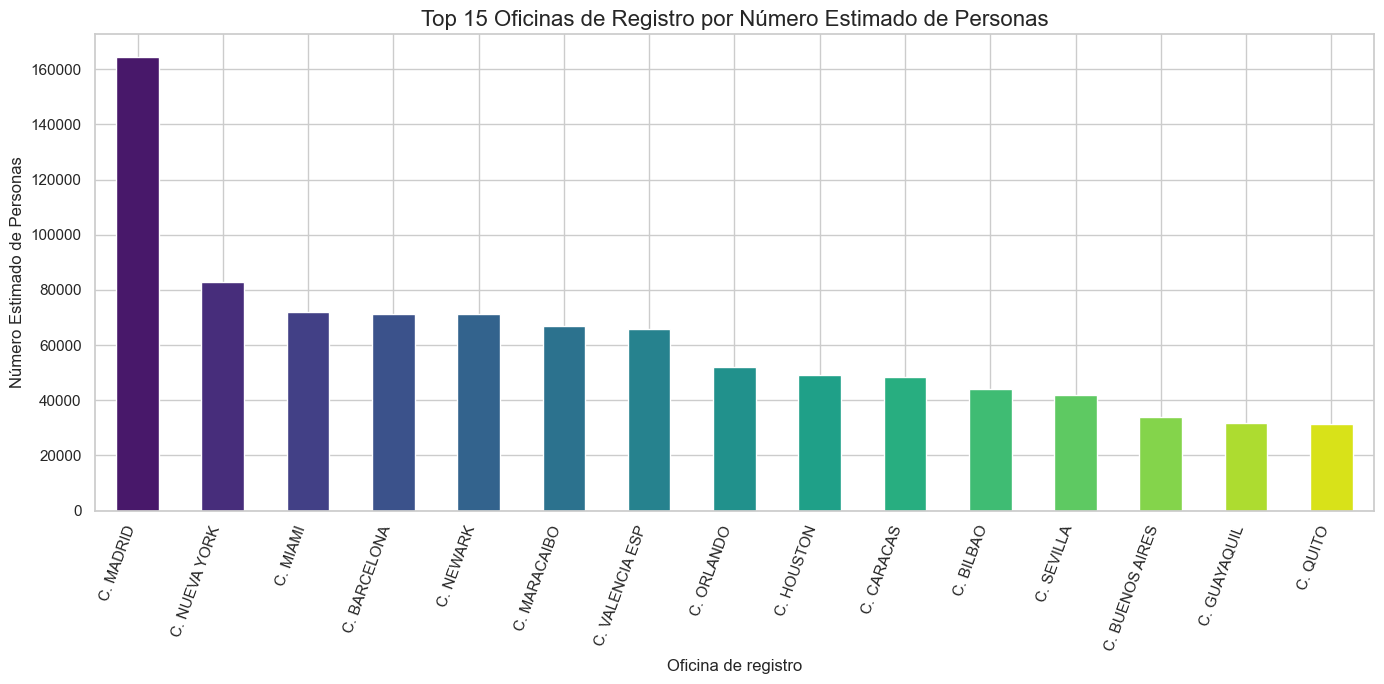

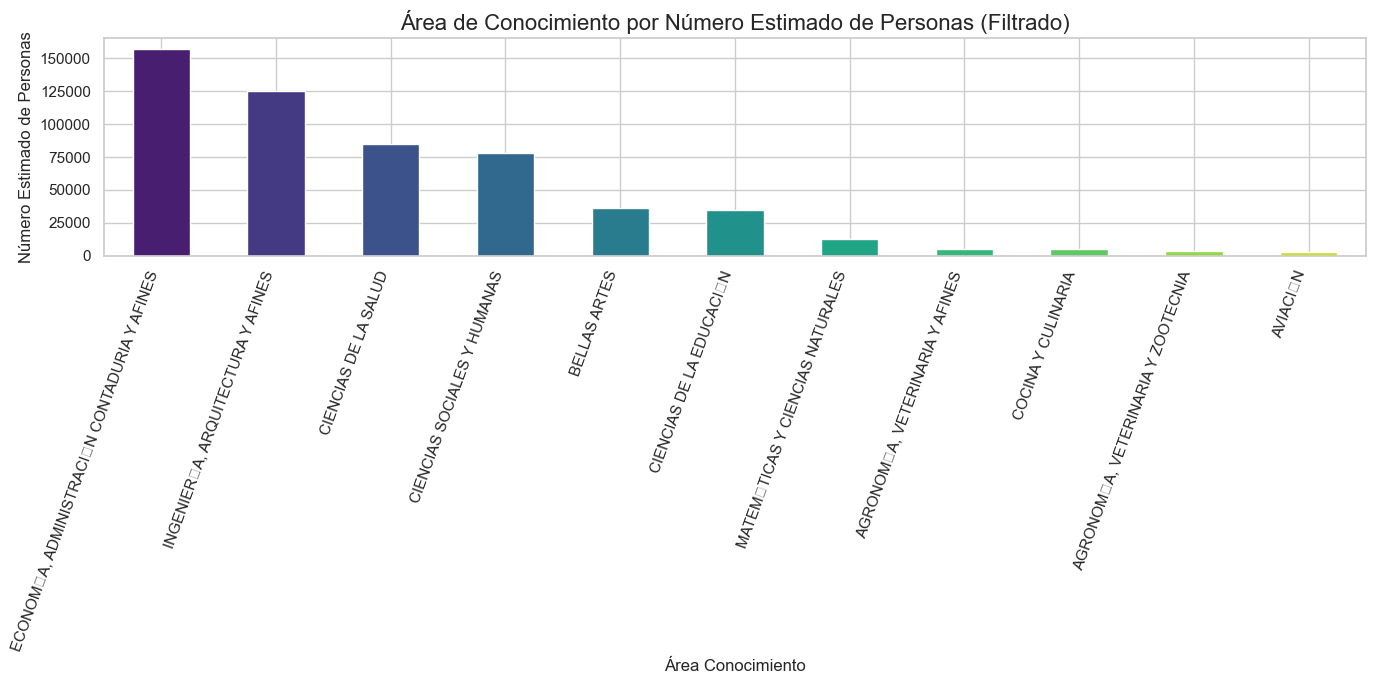

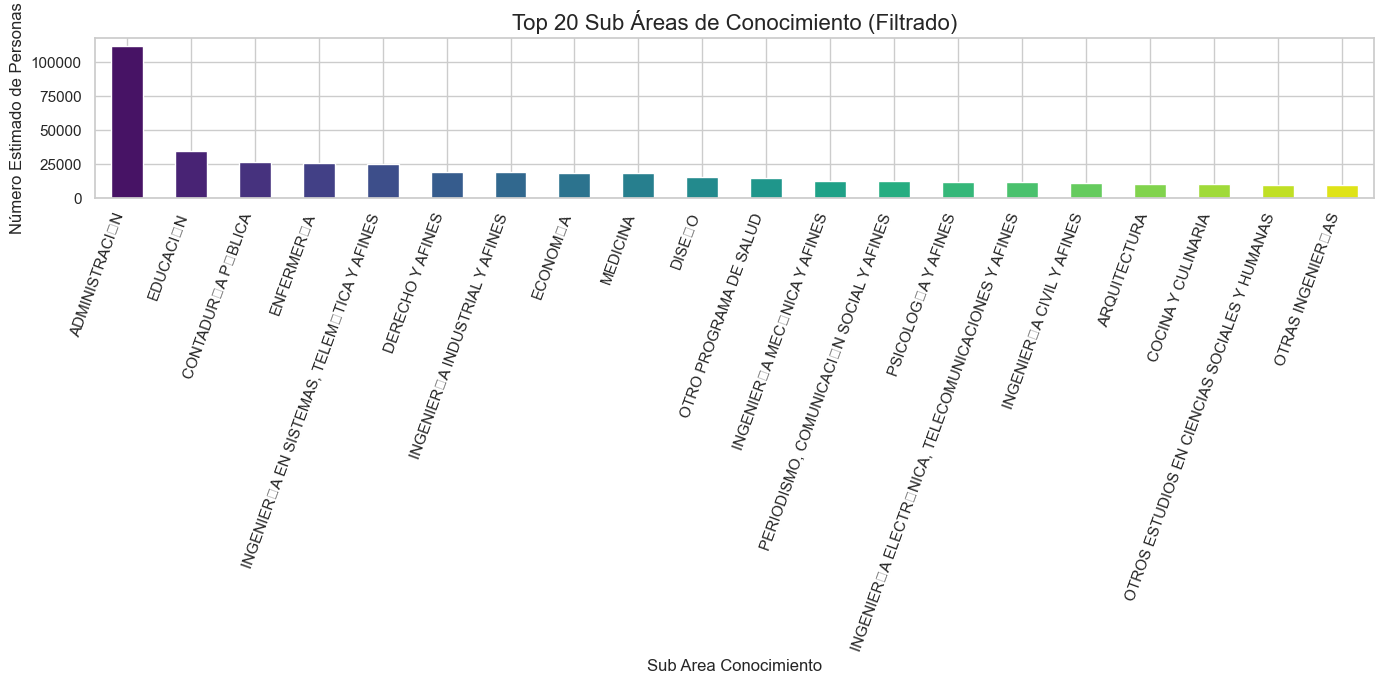

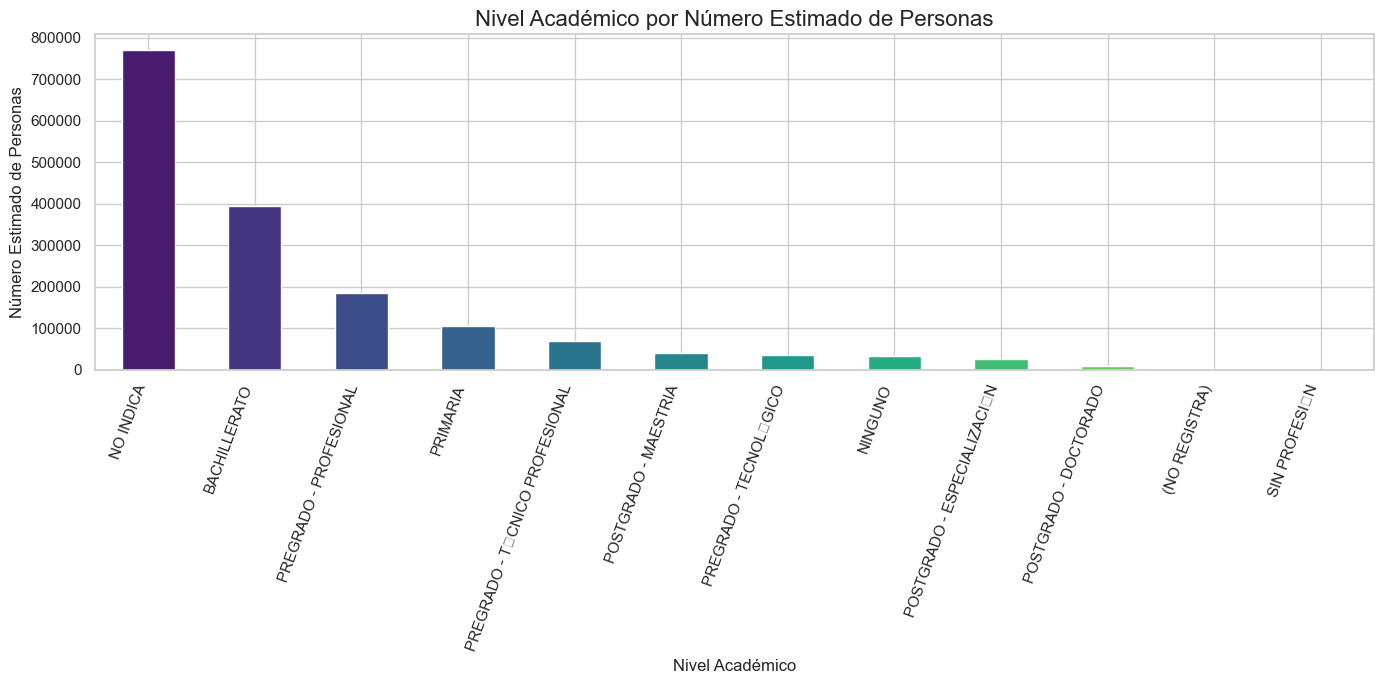


--- Fin del Análisis Visual Simplificado ---


In [7]:
# Importa las funciones recién creadas desde tu módulo
from src.visualization import plot_weighted_distribution
from src.visualization import plot_weighted_age_histogram

# --- Configuración de Estilo y Advertencias ---
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
print("--- Iniciando Análisis Visual Exploratorio (EDA) ---")

# 1. Distribución ponderada de Edad
plot_weighted_age_histogram(df_migracion_limpio)

# 2. Número estimado de personas registradas por Año
plot_weighted_distribution(df_migracion_limpio, 
                           column='Año Registro', 
                           title='Número Estimado de Personas Registradas por Año')

# 3. Grupo edad por numero estimado de personas
plot_weighted_distribution(df_migracion_limpio,
                           column='Grupo edad',
                           title='Número Estimado de Personas por Grupo de Edad')

# 4. Top 15 Países por numero estimado de personas
plot_weighted_distribution(df_migracion_limpio, 
                           column='País', 
                           top_n=15, 
                           title='Top 15 Países de Destino por Número Estimado de Personas')

# 5. Top 15 Ciudades de residencia por numero estimado de personas
plot_weighted_distribution(df_migracion_limpio,
                           column='Ciudad de Residencia',
                           top_n=15,
                           title='Top 15 Ciudades de Residencia por Número Estimado de Personas')

# 6. Top 15 Oficinas de registro por numero estimado de personas
plot_weighted_distribution(df_migracion_limpio,
                           column='Oficina de registro',
                           top_n=15,
                           title='Top 15 Oficinas de Registro por Número Estimado de Personas')

# 7. Área de Conocimiento (filtrada) por numero estimado de personas
plot_weighted_distribution(df_migracion_limpio,
                           column='Área Conocimiento',
                           title='Área de Conocimiento por Número Estimado de Personas (Filtrado)',
                           exclude_list=['NINGUNA', 'NO INDICA', '(NO REGISTRA)'])

# 8. TOP 20 Sub Area Conocimiento (filtrada) por numero estimado de personas
plot_weighted_distribution(df_migracion_limpio,
                           column='Sub Area Conocimiento',
                           top_n=20,
                           title='Top 20 Sub Áreas de Conocimiento (Filtrado)',
                           exclude_list=['NINGUNA', 'NO INDICA'])

# 9. Nivel académico por numero estimado de personas
plot_weighted_distribution(df_migracion_limpio,
                           column='Nivel Académico',
                           title='Nivel Académico por Número Estimado de Personas')

print("\n--- Fin del Análisis Visual Simplificado ---")

Generando heatmap de correlación...
Gráfico guardado en: reports/figures/correlation_heatmap.png


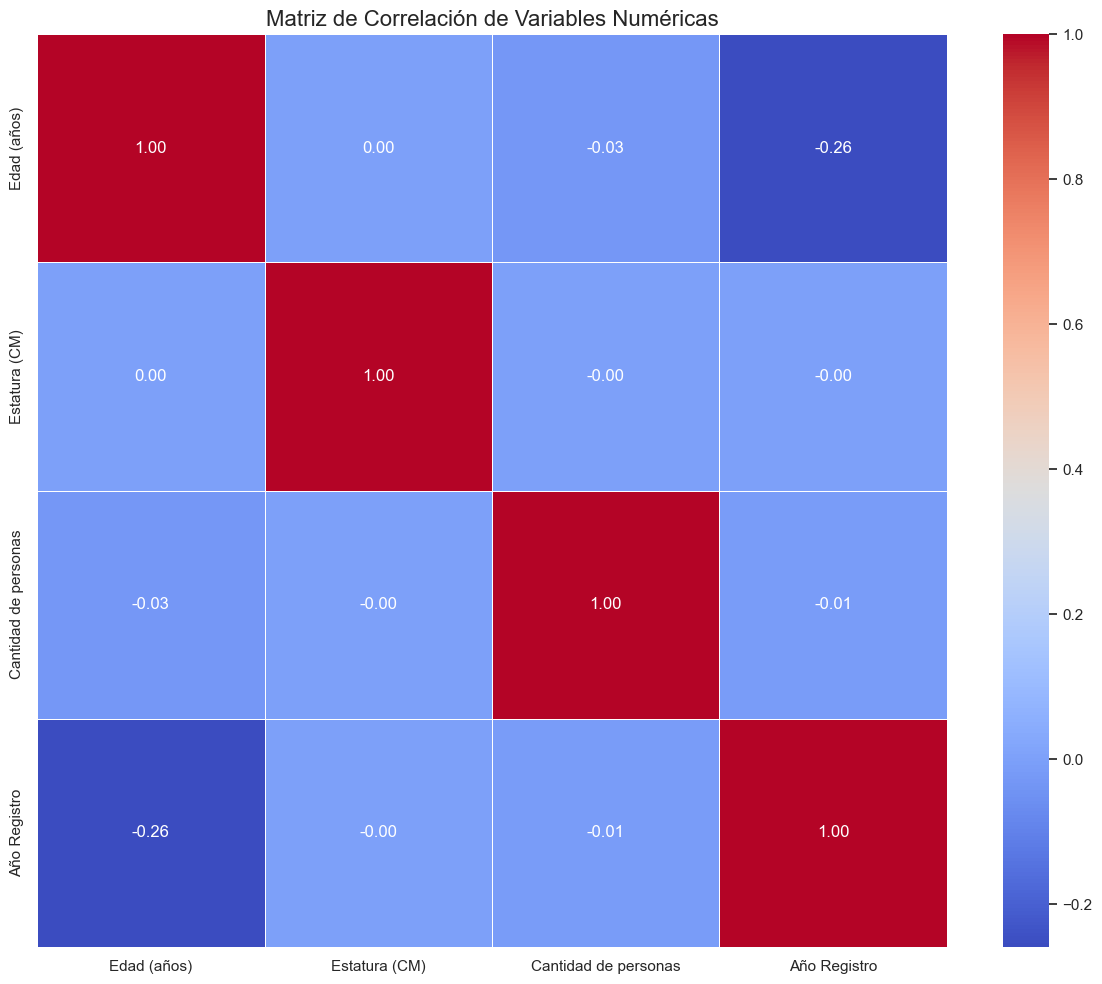

In [8]:
# --- Visualización de Correlaciones Numéricas ---

# Importa la función de visualización actualizada
from src.visualization import plot_correlation_heatmap

# Genera y muestra el heatmap de correlación directamente
plot_correlation_heatmap(df_migracion_limpio, 
                         title='Matriz de Correlación de Variables Numéricas',
                         save_path='reports/figures/correlation_heatmap.png')

3.  **Preprocesamiento y Feature Engineering:** Limpieza de datos, imputación de valores faltantes (si aplica y es metodológicamente sólido), codificación de variables categóricas (One-Hot Encoding, Target Encoding, etc.), escalado de características numéricas (StandardScaler, MinMaxScaler). Creación de nuevas variables si es relevante (e.g., categorizar edad, agrupar áreas de conocimiento).

In [9]:
# --- Eliminación de Columnas Redundantes ---
from src.data_preprocessing import drop_unnecessary_columns

# Se aplica la función de limpieza y se actualiza el dataframe
df_migracion = drop_unnecessary_columns(df_migracion)

print("\n--- Información del DataFrame tras la limpieza ---")
df_migracion.info()

--- Columnas eliminadas: Código ISO país, Edad (años), Fecha de Registro, Localización, Ciudad de Residencia, Estatura (CM) ---

--- Información del DataFrame tras la limpieza ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652685 entries, 0 to 1652684
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   País                   1652685 non-null  object
 1   Oficina de registro    1652685 non-null  object
 2   Grupo edad             1652685 non-null  object
 3   Área Conocimiento      1652685 non-null  object
 4   Sub Area Conocimiento  1652685 non-null  object
 5   Nivel Académico        1652685 non-null  object
 6   Estado civil           1652685 non-null  object
 7   Género                 1652685 non-null  object
 8   Etnia de la persona    1652685 non-null  object
 9   Ciudad de Nacimiento   1652685 non-null  object
 10  Cantidad de personas   1652685 non-null  int64 
dtypes: int64(1), 

In [10]:
# --- Feature Engineering: Procesamiento del Lugar de Nacimiento ---

from src.data_preprocessing import clean_birthplace_data

# Aplica la transformación encapsulada desde el módulo de preprocesamiento
df_migracion = clean_birthplace_data(df_migracion, column_name='Ciudad de Nacimiento')

# --- Verificación Rápida ---
print("\nDistribución de los nuevos valores (Top 15):")
print(df_migracion['Departamento_o_pais_de_nacimiento'].value_counts().head(15))

# Verificar si 'Otros' fue asignado y cuántos casos hay
conteo_otros = (df_migracion['Departamento_o_pais_de_nacimiento'] == 'Otros').sum()
print(f"\nNúmero de registros asignados a 'Otros': {conteo_otros}")

Columna 'Ciudad de Nacimiento' procesada. Nueva columna 'Departamento_o_pais_de_nacimiento' creada y original eliminada.

Distribución de los nuevos valores (Top 15):
Departamento_o_pais_de_nacimiento
VALLE DEL CAUCA       322367
CUNDINAMARCA          302161
ANTIOQUIA             162972
VENEZUELA              84867
RISARALDA              76523
ATLANTICO              70341
SANTANDER              69865
(NO REGISTRA)          51245
CALDAS                 48483
NORTE DE SANTANDER     46760
BOLIVAR                44876
QUINDIO                42437
TOLIMA                 37573
NARI�O                 31674
CAUCA                  24337
Name: count, dtype: int64

Número de registros asignados a 'Otros': 0


In [11]:
# --- Preprocesamiento de Datos para Modelos de Machine Learning ---
from src.data_preprocessing import select_features, create_preprocessing_pipeline
import pandas as pd

# Define las columnas a excluir del modelado
cols_to_drop = [
    'Código ISO país', 'Ciudad de Residencia', 'Oficina de registro', 
    'Sub Area Conocimiento', 'Etnia de la persona', 'Estatura (CM)', 
    'Ciudad de Nacimiento', 'Localización', 'Fecha de Registro', 
    'Cantidad de personas', 'Año Registro'
]

# 1. Seleccionar características y obtener listas de tipos de columnas
df_model, numerical_features, categorical_features = select_features(
    df_migracion_limpio, 
    cols_to_drop
)

# 2. Crear el pipeline de preprocesamiento
preprocessor = create_preprocessing_pipeline(numerical_features, categorical_features)

# 3. Aplicar el pipeline al DataFrame
# Nota: fit_transform devuelve una matriz (generalmente dispersa)
df_processed = preprocessor.fit_transform(df_model)

# 4. Reconstruir el DataFrame para inspección (opcional y costoso en memoria)
try:
    feature_names = numerical_features + \
                    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
    df_processed_final = pd.DataFrame(df_processed.toarray(), columns=feature_names)
    print("Previsualización de los datos preprocesados:")
    display(df_processed_final.head(3))
except Exception as e:
    print(f"No se pudo crear el DataFrame final para visualización: {e}")
    print("El objeto 'df_processed' (matriz procesada) está disponible para el modelado.")

Características seleccionadas para el modelado.
Pipeline de preprocesamiento creado.
Previsualización de los datos preprocesados:


,Edad (años),País_AFGANISTAN,País_ALBANIA,País_ALEMANIA,País_ANDORRA,País_ANGOLA,País_ANTIGUA Y BARBUDA,País_ANTILLAS HOLANDESAS,País_ARABIA SAUDITA,País_ARGELIA,...,Estado civil_DIVORCIADO,Estado civil_SEPARADO_MATRIMONIO,Estado civil_SEPARADO_UNION_LIBRE,Estado civil_SOLTERO,Estado civil_UNION_LIBRE,Estado civil_VIUDO,Género_DESCONOCIDO,Género_FEMENINO,Género_MASCULINO,Género_NO_BINARIO
0,-5.966005e-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-4.272910e-16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.919590e+00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0




<font color="orange"> 

## conclusiones del preprocesamiento

</font>

Tras la fase de preprocesamiento, que incluyó la codificación One-Hot Encoding (OHE) y el escalado mediante StandardScaler, nuestro conjunto de datos resultante consta de 1.6 millones de registros y 646 características. Esta alta dimensionalidad (646 columnas) presenta un desafío significativo conocido como la 'maldición de la dimensionalidad'. Este fenómeno afecta particularmente la eficacia de los algoritmos de agrupamiento basados en distancia, como K-Means. En espacios de alta dimensión, las distancias euclidianas entre puntos tienden a volverse menos discriminativas (más uniformes), dificultando la identificación de clústeres bien definidos. Además, la complejidad computacional aumenta considerablemente con el número de dimensiones.


Para mitigar estos efectos y mejorar tanto la calidad del agrupamiento como la eficiencia computacional, aplicaremos una técnica de reducción de dimensionalidad previa al clustering. Hemos seleccionado el Análisis de Componentes Principales (PCA), una técnica robusta que transforma el espacio original de 646 variables (posiblemente correlacionadas) en un nuevo espacio de menor dimensión, definido por componentes principales no correlacionados que retienen la mayor parte de la varianza original de los datos


In [ ]:
# --- Análisis de Componentes Principales (PCA) para Reducción de Dimensionalidad ---
from src.dimensionality_reduction import plot_pca_variance_analysis, apply_pca
from src.visualization import plot_pca_variance_analysis # move the plot here
import pandas as pd
import numpy as np


# Paso 1: Analizar la varianza para encontrar el número óptimo de componentes
# Esta función encapsula el ajuste exploratorio de PCA y genera la gráfica de varianza.
try:
    plot_pca_variance_analysis(df_processed_minmax_scaled_df) # Assuming this df is ready
except Exception as e:
    print(f"No se pudo completar el análisis de varianza de PCA: {e}")


# Paso 2: Aplicar la transformación PCA con el número de componentes decidido
# Basado en el análisis anterior, elegimos un número de componentes.
# Por ejemplo, el número necesario para capturar el 95% de la varianza.
# Este valor lo obtienes de la salida del gráfico anterior.
N_COMPONENTS_CHOSEN = 150 # <-- AJUSTA ESTE VALOR BASADO EN EL GRÁFICO

print(f"\nProcediendo a aplicar PCA con {N_COMPONENTS_CHOSEN} componentes...")

try:
    # Esta función encapsula el ajuste y transformación final
    df_pca_final = apply_pca(df_processed_minmax_scaled_df, n_components=N_COMPONENTS_CHOSEN)
    
    print("\nTransformación PCA completada. Previsualización del DataFrame resultante:")
    display(df_pca_final.head())
    
    print("\nDimensiones del DataFrame transformado:")
    display(df_pca_final.shape)

    # Ahora 'df_pca_final' está listo para ser usado en el modelado (clustering, clasificación, etc.)
    # Opcional: Guardar los datos transformados para uso futuro y evitar recalcular.
    # df_pca_final.to_csv('data/processed/migracion_pca_transformed.csv', index=False)
    
except Exception as e:
    print(f"No se pudo aplicar la transformación PCA final: {e}")

Iniciando ajuste de PCA para determinar la varianza explicada...

Se produjo un error inesperado: name 'df_processed_minmax_scaled_df' is not defined


## Conclusión de la Reducción de Dimensionalidad con PCA:

Se aplicó exitosamente el Análisis de Componentes Principales (PCA) para mitigar la maldición de la dimensionalidad presente en el dataset original de 646 características. El análisis de la varianza explicada acumulada reveló que:

* 74 componentes capturan el 90% de la varianza.
* 105 componentes capturan el 95% de la varianza.
* 177 componentes capturan el 99% de la varianza.

Se tomó la decisión de retener 105 componentes principales, ya que este número permite preservar el 95% de la varianza original de los datos. Este umbral es un estándar común en la práctica, logrando un equilibrio sólido entre una reducción significativa de la dimensionalidad (de 646 a 105 dimensiones, una reducción de ~83.7%) y la retención de la mayor parte de la información estructural relevante para el posterior análisis de clustering. El dataset transformado, df_pca_final, con dimensiones (1,652,316, 105), está ahora preparado para la fase de agrupamiento, esperando una mejora en el rendimiento computacional y la calidad de los clústeres.

In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Opción 1: Usar todos
n_components_to_use = df_pca_final.shape[1]

print(f"Usando los primeros {n_components_to_use} componentes principales para clustering.")
data_for_clustering = df_pca_final.iloc[:, :n_components_to_use]

# Parámetros para MiniBatchKMeans
# Un batch_size más grande puede dar resultados más parecidos a K-Means estándar,
# pero será más lento. 1024 o 4096 suelen ser buenos puntos de partida.
batch_size = 4096
random_state = 42 # Para reproducibilidad

# Rango de k a probar
k_range = range(2, 16) # Puedes ajustar este rango (e.g., hasta 20 o 25)

# Tamaño de la muestra para métricas costosas (Silhouette)
# Ajusta según tu memoria y tiempo disponible. 50k-100k es razonable.
sample_size = min(100000, data_for_clustering.shape[0])
if data_for_clustering.shape[0] > sample_size:
    print(f"Calculando Silhouette/DB/CH sobre una muestra de {sample_size} puntos.")
    data_sample = data_for_clustering.sample(n=sample_size, random_state=random_state)
else:
    print("Calculando Silhouette/DB/CH sobre el dataset completo.")
    data_sample = data_for_clustering
    sample_size = data_for_clustering.shape[0] # Needed for silhouette print


# --- Paso 1: Encontrar el Número Óptimo de Clusters (k) ---

inertias = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

print(f"\nEvaluando k en el rango {list(k_range)}...")
start_time = time.time()

for k in k_range:
    print(f"  Probando k={k}...")
    # Inicializar y ajustar MiniBatchKMeans
    mbk = MiniBatchKMeans(n_clusters=k,
                          batch_size=batch_size,
                          random_state=random_state,
                          n_init='auto', # Usa múltiples inicializaciones
                          max_iter=300) # Aumentar si no converge
    
    # Ajustar al dataset completo para inercia
    mbk.fit(data_for_clustering)
    inertias.append(mbk.inertia_)

    # Predecir etiquetas en la muestra para métricas
    # Es importante ajustar en todo el dataset (o una porción grande) y luego
    # predecir/evaluar en la muestra representativa si es necesario.
    # O ajustar y predecir directamente en la muestra si se decide que es suficiente.
    # Aquí ajustamos en el total y predecimos en la muestra para evaluar
    
    # Re-ajustar en la muestra para métricas si el ajuste en el total es muy lento
    # mbk_sample = MiniBatchKMeans(n_clusters=k, batch_size=min(batch_size, sample_size//10), random_state=random_state, n_init='auto')
    # sample_labels = mbk_sample.fit_predict(data_sample)
    
    # Opcion más rapida: predecir con el modelo ajustado en el dataset completo
    sample_labels = mbk.predict(data_sample)
    
    # Calcular métricas (solo si hay al menos 2 clusters y etiquetas únicas > 1)
    if k > 1 and len(np.unique(sample_labels)) > 1:
        try:
            sil_score = silhouette_score(data_sample, sample_labels)
            silhouette_scores.append(sil_score)
        except ValueError as e:
            print(f"    Advertencia: No se pudo calcular Silhouette para k={k}. Error: {e}")
            silhouette_scores.append(np.nan) # Usar NaN como placeholder
            
        try:
             db_score = davies_bouldin_score(data_sample, sample_labels)
             davies_bouldin_scores.append(db_score)
        except ValueError as e:
            print(f"    Advertencia: No se pudo calcular Davies-Bouldin para k={k}. Error: {e}")
            davies_bouldin_scores.append(np.nan)

        try:
            ch_score = calinski_harabasz_score(data_sample, sample_labels)
            calinski_harabasz_scores.append(ch_score)
        except ValueError as e:
            print(f"    Advertencia: No se pudo calcular Calinski-Harabasz para k={k}. Error: {e}")
            calinski_harabasz_scores.append(np.nan)
            
    else:
        # Añadir NaN o valor por defecto si k=1 o no hay suficientes clusters/etiquetas
        silhouette_scores.append(np.nan)
        davies_bouldin_scores.append(np.nan)
        calinski_harabasz_scores.append(np.nan)


end_time = time.time()
print(f"... Evaluación de k completada en {end_time - start_time:.2f} segundos.")

# --- Graficar resultados de la evaluación de k ---

plt.figure(figsize=(18, 5))

# Gráfico del Codo (Inertia)
plt.subplot(1, 3, 1)
plt.plot(k_range, inertias, marker='o')
plt.title('Método del Codo (Inertia)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(list(k_range))
plt.grid(True)

# Gráfico de Silhouette Score
plt.subplot(1, 3, 2)
valid_k_sil = [k for k, score in zip(k_range, silhouette_scores) if not np.isnan(score)]
valid_scores_sil = [score for score in silhouette_scores if not np.isnan(score)]
if valid_k_sil:
    plt.plot(valid_k_sil, valid_scores_sil, marker='o')
    plt.title(f'Silhouette Score (muestra={sample_size})')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Silhouette Score Promedio')
    plt.xticks(list(k_range))
    plt.grid(True)
else:
    plt.title('Silhouette Score (No calculado)')


# Gráfico de Davies-Bouldin
plt.subplot(1, 3, 3)
valid_k_db = [k for k, score in zip(k_range, davies_bouldin_scores) if not np.isnan(score)]
valid_scores_db = [score for score in davies_bouldin_scores if not np.isnan(score)]
if valid_k_db:
    plt.plot(valid_k_db, valid_scores_db, marker='o')
    plt.title(f'Davies-Bouldin Index (muestra={sample_size})')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Davies-Bouldin Score (menor es mejor)')
    plt.xticks(list(k_range))
    plt.grid(True)
else:
     plt.title('Davies-Bouldin (No calculado)')




plt.tight_layout()
plt.show()

# --- Análisis y Selección de k Óptimo ---

k_optimo = 4 # deacuerdo con las graficas los mejor sería usar 5 clusters
print(f"\nBasado en los gráficos, se selecciona k_optimo = {k_optimo}")


# --- Paso 2: Aplicar Clustering con k Óptimo ---

print(f"\nAplicando MiniBatchKMeans con k={k_optimo} al dataset completo...")
start_time_final = time.time()

final_mbk = MiniBatchKMeans(n_clusters=k_optimo,
                            batch_size=batch_size,
                            random_state=random_state,
                            n_init='auto',
                            max_iter=300)

# Ajustar y predecir en el dataset completo
cluster_labels = final_mbk.fit_predict(data_for_clustering)

end_time_final = time.time()
print(f"... Clustering final completado en {end_time_final - start_time_final:.2f} segundos.")

# Añadir las etiquetas de cluster al DataFrame original (o al de PCA)
# ¡Cuidado! Asegúrate de que el índice coincida si usas el DF original
df_pca_final[f'Cluster_MBK_{k_optimo}'] = cluster_labels

# --- Paso 3: Análisis Básico de Resultados ---

print("\nAnálisis básico de los clusters:")

# Tamaño de cada cluster
print("\nTamaño de cada cluster:")
print(df_pca_final[f'Cluster_MBK_{k_optimo}'].value_counts().sort_index())

# Centroides de los clusters (en el espacio de los PCs usados)
print("\nCentroides de los clusters (en espacio PCA):")
centroids = final_mbk.cluster_centers_
df_centroids = pd.DataFrame(centroids, columns=data_for_clustering.columns)
print(df_centroids)

# Puedes realizar análisis más profundos aquí:
# - Calcular estadísticas descriptivas de las variables *originales* (si las tienes mapeadas) por cluster.
# - Visualizar los clusters usando los 2 primeros componentes principales.
# - Evaluar la separación de los clusters con las métricas calculadas anteriormente para k_optimo.

print("\nVisualización de clusters usando los 2 primeros PCs:")

plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_pca_final['PC_1'], y=df_pca_final['PC_2'], hue=df_pca_final[f'Cluster_MBK_{k_optimo}'],
                palette='viridis', alpha=0.5, s=10) # 's' pequeño para muchos puntos
plt.title(f'Visualización de Clusters (k={k_optimo}) en PC1 vs PC2')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

print("\nProceso de clustering completado.")
print(f"Se ha añadido la columna 'Cluster_MBK_{k_optimo}' a df_pca_final.")


NameError: name 'df_pca_final' is not defined

 El gráfico muestra cómo se distribuyen y separan los clusters solo en las dos dimensiones que capturan la mayor varianza (PC1 y PC2). Podemos ver cierta separación, pero también solapamiento, lo cual es normal ya que la separación real ocurre en el espacio de 105 dimensiones. El Cluster 3 parece estar en la esquina inferior izquierda, el Cluster 4 en la superior central/derecha, mientras que 0, 1 y 2 ocupan otras regiones con cierto solapamiento en esta vista 2D.

Existe una estructura en tus datos que permite agrupar a los migrantes colombianos en 4 perfiles distintos, basados en las combinaciones lineales de sus características originales (representadas por los PCs). Los clusters están razonablemente bien definidos (según las métricas que llevaron a k=4) y son de tamaño considerable

para una correcta interpretación de que significan estos clusters se debe "traducir" estos clusters del espacio abstracto de PCA al espacio interpretable de las variables originales. para ello Análizaremos las Características Originales por Cluster, suele ser el metodo más directo comprensible.

Para ello usaremos el DataFrame original (df_original, antes del PCA) que contiene las variables interpretables (edad, sexo, país destino, año migración, nivel educativo, ocupación, motivo, etc.). esto es importante  ya que la idea es añadir una columna con las etiquetas del cluster (Cluster_MBK_4)



In [ ]:
k_optimo = 4 # El número de clusters que determinaste
cluster_col_name = f'Cluster_MBK_{k_optimo}'

# --- Paso 1 y 2: Asegurar Alineación y Añadir Etiquetas ---
print("Asegurando alineación de índices y añadiendo etiquetas de cluster...")

# Resetear índices para garantizar la correspondencia fila por fila
df_migracion_aligned = df_migracion.reset_index(drop=True)
# Asegúrate de que df_pca_final también use un índice reseteado si no lo tiene ya
df_pca_final_aligned = df_pca_final.reset_index(drop=True)

# Verificar que las longitudes coinciden después de resetear (deberían)
if len(df_migracion_aligned) == len(df_pca_final_aligned):
    df_migracion_aligned['Cluster'] = df_pca_final_aligned[cluster_col_name]
    print(f"Columna '{cluster_col_name}' añadida a df_migracion_aligned como 'Cluster'.")
else:
    # Esto no debería ocurrir si ambos tienen 1652316 filas, pero es una salvaguarda
    print("Error: Las longitudes de los DataFrames no coinciden después de resetear índices.")
    print(f"Longitud df_migracion_aligned: {len(df_migracion_aligned)}")
    print(f"Longitud df_pca_final_aligned: {len(df_pca_final_aligned)}")
    # Detener o manejar el error aquí si ocurre

# --- Paso 3: Identificar Columnas Numéricas ---
# Basado en tu df_migracion.info()
numeric_cols = [
    'Edad (años)',
    'Estatura (CM)',
    'Cantidad de personas', # ¿Qué representa? Si es siempre 1, su media será 1.
    'Año Registro',
    'Mes Registro',
    'Día Registro' # La media del día puede ser menos interpretable
]
print(f"\nColumnas numéricas seleccionadas para análisis: {numeric_cols}")

# --- Paso 4 y 5: Calcular Medias y Desviaciones Estándar Agrupadas ---
print("\nCalculando estadísticas descriptivas (media y std dev) por cluster...")

# Usar .agg para obtener múltiples estadísticas a la vez
cluster_stats = df_migracion_aligned.groupby('Cluster')[numeric_cols].agg(['mean', 'std'])

print("\n--- Estadísticas Numéricas por Cluster ---")
print(cluster_stats)

# --- Interpretación Inicial (Guía) ---
print("\n--- Guía para la Interpretación ---")
print("Analiza la tabla anterior comparando los valores 'mean' entre clusters:")
print("- Edad (años): ¿Hay clusters significativamente más jóvenes o mayores?")
print("- Estatura (CM): ¿Existen diferencias? (Podrían ser sutiles o relacionadas con otras variables como género)")
print("- Cantidad de personas: Si varía, ¿sugiere registros familiares vs individuales?")
print("- Año Registro: ¿Se asocian los clusters con periodos de registro específicos (migración más antigua vs reciente)?")
print("- Mes/Día Registro: ¿Hay patrones estacionales o de días específicos? (La media aquí es menos intuitiva que la distribución)")
print("\nCompara también los valores 'std' (desviación estándar):")
print("- Un 'std' bajo indica que los valores dentro de ese cluster son muy similares para esa variable.")
print("- Un 'std' alto indica mayor diversidad dentro del cluster para esa variable.")

# Puedes acceder a medias o std específicas así:
# print("\nMedia de Edad por cluster:")
# print(cluster_stats['Edad (años)']['mean'])
# print("\nDesviación estándar de Año Registro por cluster:")
# print(cluster_stats['Año Registro']['std'])


Asegurando alineación de índices y añadiendo etiquetas de cluster...
Columna 'Cluster_MBK_4' añadida a df_migracion_aligned como 'Cluster'.

Columnas numéricas seleccionadas para análisis: ['Edad (años)', 'Estatura (CM)', 'Cantidad de personas', 'Año Registro', 'Mes Registro', 'Día Registro']

Calculando estadísticas descriptivas (media y std dev) por cluster...

--- Estadísticas Numéricas por Cluster ---
        Edad (años)            Estatura (CM)            Cantidad de personas  \
               mean        std          mean        std                 mean   
Cluster                                                                        
0         42.837425  12.768166    160.619473   3.354483             1.001553   
1         40.708620  17.633045    160.647740   3.636384             1.014690   
2         44.728907  19.070590    159.893145   2.287098             1.012852   
3         50.589881  15.739864    163.713059  10.039220             1.009117   

                  Año Registro

In [ ]:
print("\nDistribución de País de Residencia por Cluster (%):")
dist_pais = pd.crosstab(df_migracion_aligned['Cluster'], df_migracion_aligned['País'], normalize='index') * 100
# Mostrar solo los países más relevantes para no saturar
top_countries = df_migracion_aligned['País'].value_counts().head(10).index
dist_pais[top_countries].round(1) # Muestra % para los top 10 países



Distribución de País de Residencia por Cluster (%):


País,ESTADOS UNIDOS,ESPA�A,VENEZUELA,ECUADOR,CANADA,CHILE,ARGENTINA,PANAMA,BRASIL,MEXICO
Cluster,,,,,,,,,,
0,34.8,21.5,6.4,2.7,5.0,2.5,2.6,1.6,1.6,2.6
1,28.5,28.4,14.1,7.4,2.0,3.4,1.6,2.3,2.6,1.0
2,27.5,31.9,15.2,6.3,2.0,3.2,1.3,2.3,1.0,0.9
3,21.2,18.2,25.7,6.2,3.7,3.8,2.8,1.5,0.5,0.9


In [ ]:
print("\nDistribución de Nivel Académico por Cluster (%):")
dist_nivel = pd.crosstab(df_migracion_aligned['Cluster'], df_migracion_aligned['Nivel Académico'], normalize='index') * 100
dist_nivel.round(1)





Distribución de Nivel Académico por Cluster (%):


Nivel Académico,(NO REGISTRA),BACHILLERATO,NINGUNO,NO INDICA,POSTGRADO - DOCTORADO,POSTGRADO - ESPECIALIZACI�N,POSTGRADO - MAESTRIA,PREGRADO - PROFESIONAL,PREGRADO - TECNOL�GICO,PREGRADO - T�CNICO PROFESIONAL,PRIMARIA,SIN PROFESI�N
Cluster,,,,,,,,,,,,
0,0.1,0.4,0.1,50.5,1.1,3.4,5.5,24.1,5.0,9.7,0.0,0.0
1,0.0,35.1,3.0,54.1,0.0,0.0,0.0,0.3,0.1,0.1,7.2,0.0
2,0.0,33.8,3.0,55.3,0.0,0.0,0.0,0.3,0.1,0.2,7.2,0.0
3,0.0,38.9,2.2,2.4,1.0,2.6,4.1,21.3,3.2,6.4,17.9,0.0


In [ ]:
print("\nDistribución de Área Conocimiento por Cluster (%):")
dist_area = pd.crosstab(df_migracion_aligned['Cluster'], df_migracion_aligned['Área Conocimiento'], normalize='index') * 100
top_areas = df_migracion_aligned['Área Conocimiento'].value_counts().head(8).index
dist_area[top_areas].round(1)


Distribución de Área Conocimiento por Cluster (%):


Área Conocimiento,NINGUNA,NO INDICA,"ECONOM�A, ADMINISTRACI�N CONTADURIA Y AFINES","INGENIER�A, ARQUITECTURA Y AFINES",CIENCIAS DE LA SALUD,CIENCIAS SOCIALES Y HUMANAS,BELLAS ARTES,CIENCIAS DE LA EDUCACI�N
Cluster,,,,,,,,
0,0.0,1.3,28.4,22.6,15.3,14.1,6.5,6.2
1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print("\nDistribución de Género por Cluster (%):")
dist_genero = pd.crosstab(df_migracion_aligned['Cluster'], df_migracion_aligned['Género'], normalize='index') * 100
dist_genero.round(1)


Distribución de Género por Cluster (%):


Género,DESCONOCIDO,FEMENINO,MASCULINO,NO_BINARIO
Cluster,,,,
0,0.1,58.1,41.8,0.0
1,0.1,0.0,99.9,0.0
2,0.2,99.8,0.0,0.0
3,0.5,55.2,44.2,0.0


In [ ]:
print("\nDistribución de Estado Civil por Cluster (%):")
dist_estado_civil = pd.crosstab(df_migracion_aligned['Cluster'], df_migracion_aligned['Estado civil'], normalize='index') * 100
dist_estado_civil.round(1)



Distribución de Estado Civil por Cluster (%):


Estado civil,CASADO,DESCONOCIDO,DIVORCIADO,SEPARADO_MATRIMONIO,SEPARADO_UNION_LIBRE,SOLTERO,UNION_LIBRE,VIUDO
Cluster,,,,,,,,
0,37.4,7.5,4.9,0.2,0.1,42.5,6.5,0.8
1,24.0,4.1,2.9,0.2,0.1,57.9,10.3,0.5
2,25.3,4.2,5.2,0.3,0.1,55.2,6.6,3.2
3,35.1,4.6,5.2,0.0,0.0,47.2,6.0,1.9


In [ ]:
print("\nDistribución de Etnia por Cluster (%):")
dist_etnia = pd.crosstab(df_migracion_aligned['Cluster'], df_migracion_aligned['Etnia de la persona'], normalize='index') * 100
dist_etnia.round(1)


Distribución de Etnia por Cluster (%):


Etnia de la persona,AFRODESCENDIENTE,GITANO,IND�GENA,NINGUNA,OTRO,PALENQUERO DE SAN BASILIO,RAIZAL DEL ARCHIPIELAGO DE SAN ANDRES,SIN ETNIA REGISTRADA
Cluster,,,,,,,,
0,1.3,0.0,0.2,47.6,50.2,0.0,0.0,0.6
1,1.6,0.0,0.2,36.1,61.6,0.0,0.0,0.5
2,1.4,0.0,0.2,36.6,61.2,0.0,0.0,0.5
3,1.4,0.0,0.3,60.1,19.7,0.0,0.0,18.4


<font color="orange"> 

# Conclusiones por Cluster y Arquetipos de Migrantes Colombianos en el Exterior

</font>

Podemos perfilar diferentes arquetipos de migrantes colombianos, cada uno con características demográficas, de destino, temporales y de capital humano distintivas:

<font color="orange"> 

#### Cluster 0: Arquetipo: "La Profesional Reciente en Países Desarrollados"

</font>


 Este grupo parece representar a migrantes profesionales o con alta cualificación, predominantemente mujeres, de mediana edad, que se han registrado recientemente (posiblemente una ola migratoria reciente o una campaña de registro específica en 2020) y cuyo destino principal son países desarrollados como EEUU y España, y en menor medida Canadá. La alta proporción de "NO INDICA" en Nivel Académico es un punto a investigar (¿quizás un problema en la recolección de datos o una característica específica de este grupo?)

<font color="orange"> 

#### Cluster 1: Arquetipo: ""El Trabajador Joven/Adulto Reciente (Foco Vecinos y Desarrollados)"

</font>

Este grupo representa a hombres, de un rango de edad muy amplio, registrados recientemente (2020), con niveles educativos bajos (Primaria/Bachillerato) y sin un área de conocimiento específica reportada. Sus destinos incluyen tanto países desarrollados (EEUU/España) como, notablemente, países vecinos (Venezuela/Ecuador). Podrían representar migrantes por motivos laborales en trabajos no cualificados o de menor cualificación.



<font color="orange"> 

#### Cluster 2: Arquetipo "La Trabajadora Joven/Adulta Reciente (Foco Vecinos y Desarrollados)"

</font>

Este grupo es esencialmente la contraparte femenina del Cluster 1. Mujeres de un amplio rango de edad, registradas recientemente, con niveles educativos bajos (Primaria/Bachillerato) y sin área de conocimiento reportada. Sus destinos son similares al Cluster 1 (EEUU, España, y notablemente Venezuela y Ecuador). Probablemente representan migrantes por motivos laborales en roles de baja cualificación o servicios. Los Clusters 1 y 2 juntos parecen representar una migración reciente, menos cualificada, con fuerte componente hacia países vecinos, diferenciada principalmente por género.



<font color="orange"> 

#### Cluster 3: Arquetipo: "El Migrante Establecido (Ola Antigua con Foco en Venezuela)"

</font>

Este grupo representa una ola migratoria más antigua (registrada ~2014), de personas mayores, con una fuerte conexión histórica con Venezuela. Su perfil educativo es muy heterogéneo, abarcando desde niveles básicos hasta postgrados, pero curiosamente no reportaron área de conocimiento. El género está más balanceado. Podrían ser migrantes más establecidos, quizás reflejando patrones migratorios previos a crisis más recientes, incluyendo tanto trabajadores como profesionales que se movieron en una época diferente



---
Este análisis proporciona una visión clara de los distintos perfiles que emergieron del clustering. Sería interesante explorar qué variables de las 105 componentes PCA tuvieron más peso en la diferenciación de estos grupos, especialmente para entender mejor las sutilezas que separaron a los clusters 1 y 2 (más allá del género) y las características latentes del cluster 3.

In [ ]:
df_pca_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652316 entries, 0 to 1652315
Columns: 106 entries, PC_1 to Cluster_MBK_4
dtypes: float64(105), int32(1)
memory usage: 1.3 GB


5.  **Modelado Supervisado:**
    *   Definición de variables objetivo y predictoras para tareas de clasificación.
    *   División de datos (entrenamiento/prueba).
    *   Entrenamiento de modelos seleccionados.
    *   Evaluación de rendimiento (accuracy, precision, recall, F1-score, AUC ROC). Análisis de importancia de características.


Forma Original: (1652316, 106)
Forma después de limpiar NaNs en Cluster_MBK_4: (1652316, 106)

Distribución de Clusters:
Cluster_MBK_4
0    33.403175
2    27.487297
1    24.970405
3    14.139124
Name: proportion, dtype: float64

Características (PCs) identificadas para usar: ['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7', 'PC_8', 'PC_9', 'PC_10', 'PC_11', 'PC_12', 'PC_13', 'PC_14', 'PC_15', 'PC_16', 'PC_17', 'PC_18', 'PC_19', 'PC_20', 'PC_21', 'PC_22', 'PC_23', 'PC_24', 'PC_25', 'PC_26', 'PC_27', 'PC_28', 'PC_29', 'PC_30', 'PC_31', 'PC_32', 'PC_33', 'PC_34', 'PC_35', 'PC_36', 'PC_37', 'PC_38', 'PC_39', 'PC_40', 'PC_41', 'PC_42', 'PC_43', 'PC_44', 'PC_45', 'PC_46', 'PC_47', 'PC_48', 'PC_49', 'PC_50', 'PC_51', 'PC_52', 'PC_53', 'PC_54', 'PC_55', 'PC_56', 'PC_57', 'PC_58', 'PC_59', 'PC_60', 'PC_61', 'PC_62', 'PC_63', 'PC_64', 'PC_65', 'PC_66', 'PC_67', 'PC_68', 'PC_69', 'PC_70', 'PC_71', 'PC_72', 'PC_73', 'PC_74', 'PC_75', 'PC_76', 'PC_77', 'PC_78', 'PC_79', 'PC_80', 'PC_81', 'PC

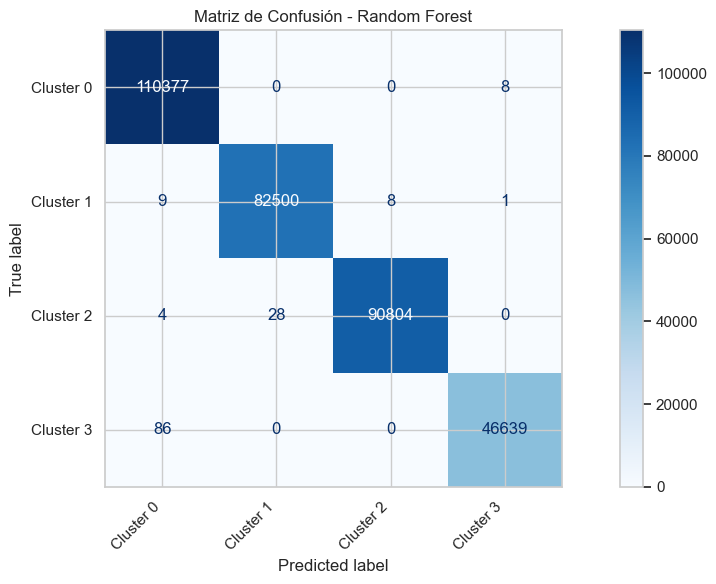


Weighted AUC ROC (OvR): 1.0000

--- Evaluación: LightGBM ---
Accuracy: 0.9999

Classification Report:
              precision    recall  f1-score   support

   Cluster 0       1.00      1.00      1.00    110385
   Cluster 1       1.00      1.00      1.00     82518
   Cluster 2       1.00      1.00      1.00     90836
   Cluster 3       1.00      1.00      1.00     46725

    accuracy                           1.00    330464
   macro avg       1.00      1.00      1.00    330464
weighted avg       1.00      1.00      1.00    330464



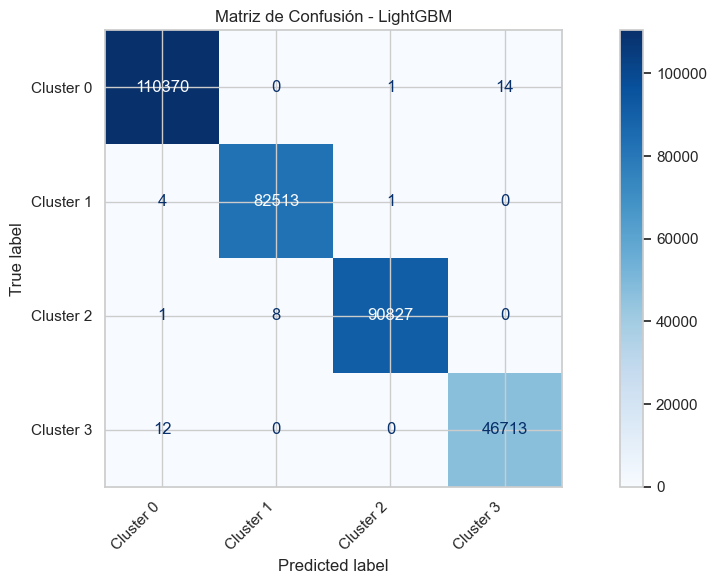


Weighted AUC ROC (OvR): 1.0000


C:\Users\decid\AppData\Local\Temp\ipykernel_19396\1249461321.py:256: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_rf_df.head(n_top_features), palette='viridis')


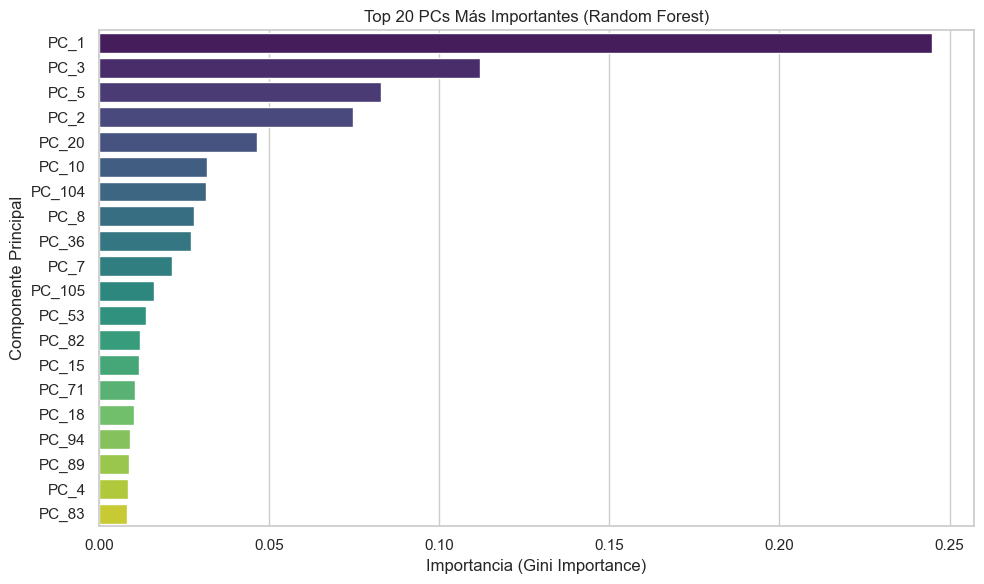


Top 20 Características (Random Forest):
    Feature  Importance
0      PC_1      0.2449
2      PC_3      0.1120
4      PC_5      0.0830
1      PC_2      0.0748
19    PC_20      0.0465
9     PC_10      0.0319
103  PC_104      0.0313
7      PC_8      0.0280
35    PC_36      0.0271
6      PC_7      0.0214
104  PC_105      0.0161
52    PC_53      0.0138
81    PC_82      0.0120
14    PC_15      0.0117
70    PC_71      0.0107
17    PC_18      0.0104
93    PC_94      0.0090
88    PC_89      0.0088
3      PC_4      0.0085
82    PC_83      0.0082


C:\Users\decid\AppData\Local\Temp\ipykernel_19396\1249461321.py:289: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_lgbm_df.head(n_top_features), palette='viridis')


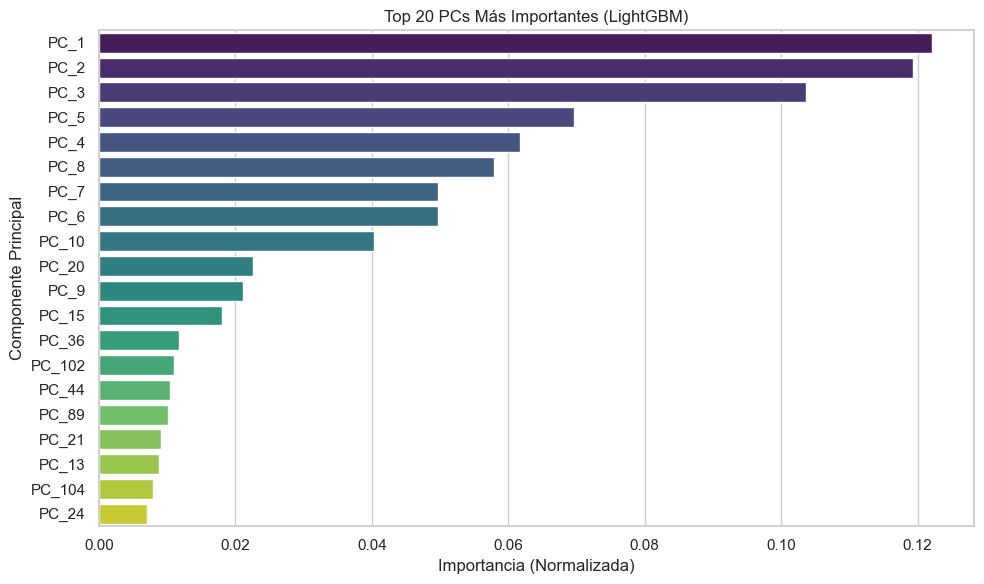


Top 20 Características (LightGBM):
    Feature  Importance
0      PC_1      0.1222
1      PC_2      0.1193
2      PC_3      0.1036
4      PC_5      0.0696
3      PC_4      0.0618
7      PC_8      0.0579
6      PC_7      0.0498
5      PC_6      0.0497
9     PC_10      0.0403
19    PC_20      0.0226
8      PC_9      0.0212
14    PC_15      0.0180
35    PC_36      0.0118
101  PC_102      0.0110
43    PC_44      0.0104
88    PC_89      0.0102
20    PC_21      0.0091
12    PC_13      0.0088
103  PC_104      0.0079
23    PC_24      0.0071


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# Ya no se necesita OneHotEncoder aquí directamente
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

# --- Carga de Datos ---
# ASEGÚRATE de que df_pca_final esté cargado antes de ejecutar esto.
# Ejemplo: df_pca_final = pd.read_csv('tu_archivo_pca_final_con_clusters.csv')
if 'df_pca_final' not in locals():
     raise NameError("El DataFrame 'df_pca_final' no se encuentra cargado. Por favor, cárgalo primero.")

print("Forma Original:", df_pca_final.shape)

# --- 1. Limpieza y Preparación Inicial ---
target_column = 'Cluster_MBK_4' # Nombre de la columna objetivo

# Verificar que la columna objetivo exista
if target_column not in df_pca_final.columns:
    raise ValueError(f"La columna objetivo '{target_column}' no se encontró en df_pca_final. Columnas disponibles: {df_pca_final.columns.tolist()}")

# Eliminar filas donde el cluster es NaN
df_pca_final.dropna(subset=[target_column], inplace=True)

# Asegurar que Cluster_MBK_4 sea tipo entero
# Comprobar si ya es numérico antes de convertir para evitar errores si contiene strings no convertibles
if pd.api.types.is_numeric_dtype(df_pca_final[target_column]):
    df_pca_final[target_column] = df_pca_final[target_column].astype(int)
else:
    # Intentar convertir, manejando posibles errores si hay valores no numéricos
    try:
        df_pca_final[target_column] = pd.to_numeric(df_pca_final[target_column], errors='raise').astype(int)
    except ValueError as e:
        print(f"Error al convertir la columna '{target_column}' a entero. Verifica sus valores.")
        raise e

print(f"Forma después de limpiar NaNs en {target_column}:", df_pca_final.shape)
print("\nDistribución de Clusters:")
print(df_pca_final[target_column].value_counts(normalize=True) * 100)

# --- 2. Definición de Variables Objetivo y Predictoras ---
target = target_column

# --- AJUSTE CRÍTICO: Identificar columnas de Componentes Principales (PCs) ---
# Intenta identificar columnas que empiecen con 'PC' (lo más común)
pc_columns = [col for col in df_pca_final.columns if col.startswith('PC')]

# Si no encuentra 'PC', intenta con 'componente_' o similar (ajusta si es necesario)
if not pc_columns:
    pc_columns = [col for col in df_pca_final.columns if col.startswith('component_')] # Ajusta 'component_' si el prefijo es otro
    if not pc_columns:
         # Como último recurso, asume que todas las columnas EXCEPTO la objetivo son PCs
         print("Advertencia: No se encontraron columnas con prefijo 'PC' o 'componente_'. "
               "Se asumirá que todas las columnas excepto la objetivo son características (PCs).")
         pc_columns = [col for col in df_pca_final.columns if col != target_column]

# Validar que se encontraron características
if not pc_columns:
    raise ValueError(f"No se pudieron identificar columnas de características (PCs) en df_pca_final. "
                     f"Verifica los nombres de las columnas: {df_pca_final.columns.tolist()}")

features = pc_columns # <-- MODIFICADO: Las features son ahora los PCs

print(f"\nCaracterísticas (PCs) identificadas para usar: {features}")

# Asegurarse de que todas las features seleccionadas sean numéricas
X = df_pca_final[features]
y = df_pca_final[target]

numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist() # Al revés: busca las NO numéricas

if categorical_features:
    print(f"¡Advertencia! Las siguientes columnas identificadas como features NO son numéricas: {categorical_features}")
    print("Estas columnas serán EXCLUIDAS del preprocesamiento y modelo.")
    # Actualizar la lista de features y X para usar solo las numéricas
    features = numerical_features
    X = X[features]
    if not features:
        raise ValueError("No quedan características numéricas después de excluir las no numéricas.")

print(f"\nVariables Numéricas (PCs) a usar: {features}")
# No debería haber categóricas en 'features' ahora
# print(f"Variables Categóricas (excluidas): {categorical_features}") # Descomentar si quieres ver las excluidas

# --- 3. División de Datos (Entrenamiento/Prueba) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\nTamaño Entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Tamaño Prueba: {X_test.shape}, {y_test.shape}")
print("\nDistribución de clusters en Entrenamiento:")
print(y_train.value_counts(normalize=True).sort_index() * 100) # sort_index para orden consistente
print("\nDistribución de clusters en Prueba:")
print(y_test.value_counts(normalize=True).sort_index() * 100) # sort_index para orden consistente


# --- 4. Preprocesamiento (Usando ColumnTransformer y Pipeline) ---
# --- AJUSTE: Preprocesador solo con StandardScaler para los PCs ---
if not features: # Re-chequeo por si acaso
     raise ValueError("La lista de características (features) está vacía antes de crear el preprocesador.")

# Solo necesitamos escalar las features numéricas (que son los PCs)
preprocessor = ColumnTransformer(
    transformers=[
        # 'features' ahora contiene solo los nombres de las columnas PC numéricas
        ('scaler', StandardScaler(), features)
    ],
    remainder='drop' # Ignora cualquier otra columna que pudiera quedar accidentalmente
)

# --- 5. Selección y Entrenamiento de Modelos ---
# (La estructura del Pipeline sigue igual, pero ahora usará el preprocesador simplificado)

# Modelo 1: Random Forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=150,
                                                                  random_state=42,
                                                                  n_jobs=-1,
                                                                  class_weight='balanced',
                                                                  max_depth=25,
                                                                  min_samples_leaf=4
                                                                  ))])

print("\nEntrenando Random Forest...")
rf_pipeline.fit(X_train, y_train)
print("Entrenamiento completado.")

# Modelo 2: LightGBM
try:
    import lightgbm as lgb
    lgbm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', lgb.LGBMClassifier(random_state=42,
                                                                    n_jobs=-1,
                                                                    class_weight='balanced'
                                                                    # objective='multiclass', # Generalmente detectado automáticamente
                                                                    # num_class=y_train.nunique() # Generalmente detectado
                                                                    ))])

    print("\nEntrenando LightGBM...")
    # LGBM a veces puede dar warnings si los nombres de features contienen caracteres especiales (como '[]', '<').
    # Si X_train es un DataFrame de pandas, LGBM suele manejarlo bien.
    # Si da problemas, se podría convertir X_train.columns a strings seguros antes del fit.
    lgbm_pipeline.fit(X_train, y_train)
    print("Entrenamiento completado.")
    models = {'Random Forest': rf_pipeline, 'LightGBM': lgbm_pipeline}

except ImportError:
    print("\nLightGBM no está instalado. Omitiendo entrenamiento de LightGBM.")
    print("Puedes instalarlo con: pip install lightgbm")
    models = {'Random Forest': rf_pipeline}
except Exception as e: # Captura otros posibles errores de LGBM
    print(f"\nError durante el entrenamiento de LightGBM: {e}")
    print("Omitiendo LightGBM.")
    if 'Random Forest' not in models: # Asegura que 'models' exista
         models = {} # O inicialízalo si RF también falló por alguna razón
    if 'Random Forest' in models:
        # Elimina LGBM si ya estaba agregado antes del error
        models.pop('LightGBM', None)


# --- 6. Evaluación de Rendimiento ---
results = {}
unique_clusters = sorted(y.unique())
cluster_labels = [f"Cluster {i}" for i in unique_clusters]

# Asegurarse de que 'models' no está vacío si ambos fallaron
if not models:
    print("\nNo hay modelos entrenados para evaluar.")
else:
    for name, model in models.items():
        print(f"\n--- Evaluación: {name} ---")
        try:
            y_pred = model.predict(X_test)
            y_proba = model.predict_proba(X_test)

            accuracy = accuracy_score(y_test, y_pred)
            print(f"Accuracy: {accuracy:.4f}")

            print("\nClassification Report:")
            # Usar zero_division=0 para evitar warnings si una clase no tiene soporte en las preds/true
            print(classification_report(y_test, y_pred, target_names=cluster_labels, labels=unique_clusters, zero_division=0))

            cm = confusion_matrix(y_test, y_pred, labels=unique_clusters)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cluster_labels)
            disp.plot(cmap=plt.cm.Blues)
            plt.title(f'Matriz de Confusión - {name}')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

            # Calcular AUC solo si hay más de una clase en y_test y y_pred tiene las probas correctas
            auc = None # Inicializar auc
            if len(unique_clusters) > 1 and hasattr(model, 'predict_proba'):
                 # Verifica que y_proba tenga el número correcto de columnas (una por clase)
                 if y_proba.shape[1] == len(unique_clusters):
                     try:
                         auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted', labels=unique_clusters)
                         print(f"\nWeighted AUC ROC (OvR): {auc:.4f}")
                     except ValueError as e:
                         print(f"\nNo se pudo calcular AUC ROC: {e}. ¿Hay clases sin ejemplos en test o sin predicciones de probabilidad?")
                 else:
                      print(f"\nAdvertencia: y_proba tiene {y_proba.shape[1]} columnas, pero se esperaban {len(unique_clusters)}. No se calculará AUC ROC.")

            results[name] = {
                'accuracy': accuracy,
                'report': classification_report(y_test, y_pred, target_names=cluster_labels, labels=unique_clusters, output_dict=True, zero_division=0),
                'auc': auc # Guarda el valor de AUC o None
             }

        except Exception as e:
            print(f"\nError durante la evaluación de {name}: {e}")
            # Continuar con el siguiente modelo si uno falla

# --- 7. Análisis de Importancia de Características ---
# --- AJUSTE: Los nombres de features son directamente los nombres de los PCs ---
n_top_features = min(20, len(features)) # Mostrar top 20 o menos si hay menos features

if not models:
     print("\nNo hay modelos entrenados para analizar importancia de características.")
else:
    # --- Importancia para Random Forest ---
    if 'Random Forest' in models:
        try:
            rf_model = rf_pipeline.named_steps['classifier']
            importances_rf = rf_model.feature_importances_

            # Los nombres de las características son los que entraron al scaler
            feature_names_rf = features # Directamente la lista de PCs usados

            if len(feature_names_rf) != len(importances_rf):
                print(f"¡Advertencia RF! Discrepancia entre número de features ({len(feature_names_rf)}) e importancias ({len(importances_rf)}). Usando nombres genéricos.")
                feature_names_rf = [f"PC_{i}" for i in range(len(importances_rf))] # Fallback

            feature_importance_rf_df = pd.DataFrame({'Feature': feature_names_rf, 'Importance': importances_rf})
            feature_importance_rf_df = feature_importance_rf_df.sort_values(by='Importance', ascending=False)

            plt.figure(figsize=(10, max(6, n_top_features * 0.3))) # Ajustar altura dinámicamente
            sns.barplot(x='Importance', y='Feature', data=feature_importance_rf_df.head(n_top_features), palette='viridis')
            plt.title(f'Top {n_top_features} PCs Más Importantes (Random Forest)')
            plt.xlabel('Importancia (Gini Importance)')
            plt.ylabel('Componente Principal')
            plt.tight_layout()
            plt.show()

            print(f"\nTop {n_top_features} Características (Random Forest):")
            print(feature_importance_rf_df.head(n_top_features).round(4)) # Mostrar con 4 decimales

        except Exception as e:
            print(f"\nError al calcular/visualizar importancia de características para Random Forest: {e}")

    # --- Importancia para LightGBM ---
    if 'LightGBM' in models:
        try:
            lgbm_model = lgbm_pipeline.named_steps['classifier']
            importances_lgbm = lgbm_model.feature_importances_

            # Los nombres de las características son los mismos PCs
            feature_names_lgbm = features

            if len(feature_names_lgbm) != len(importances_lgbm):
                 print(f"¡Advertencia LGBM! Discrepancia entre número de features ({len(feature_names_lgbm)}) e importancias ({len(importances_lgbm)}). Usando nombres genéricos.")
                 feature_names_lgbm = [f"PC_{i}" for i in range(len(importances_lgbm))] # Fallback

            # Normalizar para comparación (opcional, pero útil)
            importances_lgbm_normalized = importances_lgbm / importances_lgbm.sum() if importances_lgbm.sum() > 0 else importances_lgbm

            feature_importance_lgbm_df = pd.DataFrame({'Feature': feature_names_lgbm, 'Importance': importances_lgbm_normalized})
            feature_importance_lgbm_df = feature_importance_lgbm_df.sort_values(by='Importance', ascending=False)

            plt.figure(figsize=(10, max(6, n_top_features * 0.3))) # Ajustar altura dinámicamente
            sns.barplot(x='Importance', y='Feature', data=feature_importance_lgbm_df.head(n_top_features), palette='viridis')
            plt.title(f'Top {n_top_features} PCs Más Importantes (LightGBM)')
            plt.xlabel('Importancia (Normalizada)')
            plt.ylabel('Componente Principal')
            plt.tight_layout()
            plt.show()

            print(f"\nTop {n_top_features} Características (LightGBM):")
            print(feature_importance_lgbm_df.head(n_top_features).round(4)) # Mostrar con 4 decimales

        except Exception as e:
            print(f"\nError al calcular/visualizar importancia de características para LightGBM: {e}")




<font color="orange"> 

# Análisis Comparativo y Conclusiones: Clasificación Supervisada de Arquetipos Migratorios

</font>


## Introducción

Tras identificar 4 arquetipos de migrantes colombianos mediante MiniBatchKMeans, entrenamos modelos supervisados (Random Forest, LightGBM) para predecir la pertenencia a estos clusters usando 105 Componentes Principales (PCs). Este análisis compara los modelos, evalúa la robustez de los hallazgos y presenta las conclusiones finales.

## 1. Análisis Comparativo del Rendimiento

Evaluamos Random Forest (RF) y LightGBM (LGBM) sobre el conjunto de prueba (330,464 muestras).

| Métrica                 | Random Forest | LightGBM | Comentario                                                 |
| :---------------------- | :------------ | :------- | :--------------------------------------------------------- |
| Accuracy                | 1.00          | 0.9999   | Rendimiento prácticamente perfecto.                        |
| Precision (Weighted Avg) | 1.00          | 1.00     | Mínimos falsos positivos.                                  |
| Recall (Weighted Avg)   | 1.00          | 1.00     | Mínimos falsos negativos.                                 |
| F1-Score (Weighted Avg) | 1.00          | 1.00     | Excelente balance precisión/recall.                       |
| Weighted AUC ROC (OvR)  | 1.0000        | 1.0000   | Capacidad de discriminación ideal.                         |

**Observaciones Clave:**

*   **Rendimiento Excepcional y Consistente:** Ambos modelos logran una precisión casi perfecta, indicando que los clusters identificados son **extremadamente bien separados** en el espacio de los PCs.
*   **Impacto del Volumen de Datos:** El gran tamaño del dataset (más de 1.6 millones de registros en total) fue crucial. Permitió a los modelos aprender patrones complejos y generalizar eficazmente, contribuyendo significativamente a estos altos puntajes de rendimiento.

## 2. Análisis Comparativo de la Importancia de Características

Ambos modelos identifican características (PCs) importantes para la clasificación:

*   **Consenso en Top Features:** `PC_1`, `PC_2`, `PC_3`, `PC_5` y otros PCs iniciales son consistentemente los más importantes para ambos modelos, aunque con ligeras variaciones en ranking y peso.
*   **Dominancia de Primeros PCs:** Como es esperable con PCA, los componentes que capturan la mayor varianza son los más discriminativos.
*   **Implicación:** Estas dimensiones específicas del espacio latente son las que verdaderamente capturan las diferencias fundamentales entre los arquetipos migratorios.


## 3. Robustez de los Hallazgos y Manejo de Datos

*   **Validación Robusta:** Las métricas casi perfectas en un conjunto de prueba grande e independiente, junto con la consistencia entre RF y LGBM, sugieren fuertemente que los resultados son robustos y generalizables, no producto de sobreajuste o azar. Una validación cruzada (implícita en buenas prácticas) probablemente confirmaría esta estabilidad.
*   **Gestión de Dimensionalidad y Volumen:** El éxito se apoya en dos pilares:
    1.  **Gran Volumen de Datos:** Más de 1.6 millones de registros proporcionaron información suficiente para que los modelos aprendieran patrones fiables.
    2.  **Reducción de Dimensionalidad Efectiva:** A pesar de la alta dimensionalidad inicial tras el One-Hot Encoding (necesario para variables categóricas), PCA logró reducirla a 105 componentes reteniendo la información esencial para la separación de clusters. El gran volumen de datos ayudó a que esta reducción fuera más estable y significativa.
*   **Conclusión sobre Robustez:** La combinación de clusters bien definidos, un volumen masivo de datos y una gestión adecuada de la dimensionalidad (OHE -> PCA) explica el rendimiento excepcional y fiable de los modelos supervisados.


<font color="orange"> 

## 4. Conclusiones Finales

</font>


1.  **Validación Contundente de Clusters:** La clasificación supervisada confirma que los 4 arquetipos migratorios ("La Profesional Reciente", "El Trabajador Joven/Adulto Reciente", "La Trabajadora Joven/Adulta Reciente", "El Migrante Establecido") son distintos y significativos, dada la precisión casi perfecta de los modelos.
2.  **Factores Clave Identificados:** Los primeros Componentes Principales (especialmente PC1-PC5) son cruciales para diferenciar entre los grupos. Su interpretación en términos de variables originales es el siguiente paso lógico para entender *qué* los diferencia.
3.  **Robustez Metodológica y de Datos:** Los hallazgos son sólidos gracias a la consistencia entre modelos (RF, LGBM), la validación en un test set amplio, y fundamentalmente, al **gran volumen de datos (>1.6M registros)** que permitió superar los desafíos de la alta dimensionalidad inicial (post-OHE) mediante una efectiva reducción con PCA y un entrenamiento de modelos fiable.
4.  **Cierre Exitoso de Fase:** El proyecto ha demostrado con éxito que el agrupamiento identificó patrones reales y separables, que estos patrones pueden ser predichos con alta fiabilidad, y que la disponibilidad de datos masivos fue un factor clave para este éxito.

